In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ast

# Data Cleaning

Before I begin creating the visuals that will aid my project, I am first goign to clean all of my dataset and make sure each of them are clean, easy to understand, and ready to be used. I will be going through each dataset one by one to avoid confusion. 


### The Best New Artist Grammy Winners List 

**Reading the dataset

In [146]:
best_new = pd.read_csv('best_new2.csv')
best_new_df = pd.DataFrame(best_new)
best_new_df


,award_date,artist
0,"February 27, 1980",Rickie Lee Jones
1,"February 25, 1981",Christopher Cross
2,"February 24, 1982",Sheena Easton
3,"February 23, 1983",Men At Work
4,"February 28, 1984",Culture
5,"February 26, 1985",Cyndi Lauper
6,"February 25, 1986",Sade
7,"February 24, 1987",Bruce Hornsby & The Range
8,"March 2, 1988",Jody Watley
9,"February 22, 1989",Tracy Chapman


In [147]:
# will be focusing on artists start from 1985

# dropping the first five columns (1980-1984 winners)
best_new_df = best_new_df.drop(best_new_df.index[:5])

**Checking the Data Types**

In [148]:
best_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 5 to 42
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   award_date  38 non-null     object
 1   artist      38 non-null     object
dtypes: object(2)
memory usage: 740.0+ bytes


The "award_date" column is labeled as an object, let's change this to a date/time data type. 

In [149]:
best_new_df['award_date'] = pd.to_datetime(best_new_df['award_date'])

best_new_df.head()

,award_date,artist
5,1985-02-26,Cyndi Lauper
6,1986-02-25,Sade
7,1987-02-24,Bruce Hornsby & The Range
8,1988-03-02,Jody Watley
9,1989-02-22,Tracy Chapman


In [150]:
# checking the data types again 
best_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 5 to 42
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   award_date  38 non-null     datetime64[ns]
 1   artist      38 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 740.0+ bytes


In [151]:
# checking for missing values
best_new_df.isna().sum()

award_date    0
artist        0
dtype: int64

These columns in the dataset now have the nessecary data types and do not have missing values.

### The Billboard Hot 100s Chart Data Cleanup 

**Reading the data**

In [8]:
hot100_read = pd.read_csv('chart_data.csv')

hot100_df = pd.DataFrame(hot100_read)

hot100_df

,week_of,rank,song_title,artist_name,peak_position
0,2024-02-03,1,Lovin On Me,Jack Harlow,1
1,2024-02-03,2,Cruel Summer,Taylor Swift,3
2,2024-02-03,3,Greedy,Tate McRae,4
3,2024-02-03,4,Lose Control,Teddy Swims,8
4,2024-02-03,5,I Remember Everything,Zach Bryan Featuring Kacey Musgraves,6
...,...,...,...,...,...
199995,1985-10-12,96,Everytime You Go Away,Paul Young,84
199996,1985-10-12,97,Janet,Commodores,92
199997,1985-10-12,98,Forever,Kenny Loggins,98
199998,1985-10-12,99,A Little Bit of Heaven,Natalie Cole,97


In [9]:
# dropping peak position

hot100_df = hot100_df.drop('peak_position', axis = 'columns')

**Why did I drop this column?**

Of the bat, I decided to remove the peak postion column as I will not be using this column in any of my future modeling or visualizations. Furthermore, I can easily find the highest chart postion a song or artist received by using the rank column.

In [10]:
#checking the new dataset
hot100_df.head()

,week_of,rank,song_title,artist_name
0,2024-02-03,1,Lovin On Me,Jack Harlow
1,2024-02-03,2,Cruel Summer,Taylor Swift
2,2024-02-03,3,Greedy,Tate McRae
3,2024-02-03,4,Lose Control,Teddy Swims
4,2024-02-03,5,I Remember Everything,Zach Bryan Featuring Kacey Musgraves


**Checking the Data Types of the dataset**

In [11]:
hot100_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   week_of      200000 non-null  object
 1   rank         200000 non-null  int64 
 2   song_title   200000 non-null  object
 3   artist_name  200000 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.1+ MB


The "week_of" column is labeled as an object data type. Below I will go ahead and change this to a date/time data type. 

In [12]:
# Adjusting the data type of the week_of column

hot100_df['week_of'] = pd.to_datetime(hot100_df['week_of'])

hot100_df.head()

,week_of,rank,song_title,artist_name
0,2024-02-03,1,Lovin On Me,Jack Harlow
1,2024-02-03,2,Cruel Summer,Taylor Swift
2,2024-02-03,3,Greedy,Tate McRae
3,2024-02-03,4,Lose Control,Teddy Swims
4,2024-02-03,5,I Remember Everything,Zach Bryan Featuring Kacey Musgraves


In [13]:
# Checking the data types again
hot100_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   week_of      200000 non-null  datetime64[ns]
 1   rank         200000 non-null  int64         
 2   song_title   200000 non-null  object        
 3   artist_name  200000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.1+ MB


Now all of the columns have the necessary data types. Furthermore, the .info() function also tells me that there are no missing values in this dataset. Below I will further ensure this fact. 

In [14]:
# Checking the number of missing values
hot100_df.isna().sum()

week_of        0
rank           0
song_title     0
artist_name    0
dtype: int64

No mising values in this dataset!

## Splitting the columns 

Songs may feature one or many artists, which is addressed in different ways in the a song's title and credits. Since I will be directly dealing with the songs on the Billboard Hot 100 Charts, I want to analyze each artist involved in making the song. This is because I will be looking for the number of singles each artist in the "best_new" dataset has had throughout the years. To do this, I have to split artist_name column into separate columns, as multiple song artists may be listed in a single column, thus being regarded as a single entity. I will split this column into several featured_artists columns. 


In [15]:
# creating a copy of the original hot 100s dataset
hot100_split = hot100_df

### First Split

The first split I will do is going to simply separate the artists listed before the word (and its variations) "featuring". 

In [16]:
# Defining the diferrent variations of the word "featuring" 
# This variable will be used as the seperator to split a string of artists
separator_pattern_feat = r'\s+(?:Featuring|feat|ft|Feat|Ft|featuring)\b\s+'


#spliting the column 
split_artists = hot100_split['artist_name'].str.split(separator_pattern_feat, 
                                                      n = 1, 
                                                      expand = True)


# Adding the new split columns to the hot100_split dataset 
hot100_split['main_artist'] = split_artists[0]

hot100_split['featured_artists'] = split_artists[1]




hot100_split.head()

,week_of,rank,song_title,artist_name,main_artist,featured_artists
0,2024-02-03,1,Lovin On Me,Jack Harlow,Jack Harlow,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,Taylor Swift,None
2,2024-02-03,3,Greedy,Tate McRae,Tate McRae,None
3,2024-02-03,4,Lose Control,Teddy Swims,Teddy Swims,None
4,2024-02-03,5,I Remember Everything,Zach Bryan Featuring Kacey Musgraves,Zach Bryan,Kacey Musgraves


### Second Split 

Investigating this dataset made me recall the fact that some songs may have various main artists. Songs with two or more artists do not also label the other artists as features. There are cases where the artists may have equally collaborated/worked on or both have equal strength on a song. In these cases, these songs may list more than one artist as a main artist of a song, rather than a feature of a song. Before continuing to separate the featured artists column, I will go ahead and split the main_artist column (using "and" variations) to ensure that the different artists are represented individually. 

However, I to have to be aware that three of the artists in the best_new data include "&" in their band/group names. These artists include: Bruce Hornsby & The Range, Hootie & The Blowfish, and Macklemore & Ryan Lewis. When creating the separator pattern variable, I will ensure to include the exceptions of these instances in order to avoid spliting these bands into unnecassary entities.  

In [17]:
# New variable to define the diferrent variations of the word "and"
# includes the exceptions of specific words from groups that shouldn't be split
separator_pattern_main = r'\s+(?:&(?! The Range| The Blowfish| Ryan Lewis)|(?i)and(?! The Range| The Blowfish| Ryan Lewis))\s+'


# splitting the 'main_artist' column based on the separator pattern
split_main_artists = hot100_split['main_artist'].str.split(separator_pattern_main, expand=True)

# renaming the split columns
split_main_artists.columns = [f'main_artist_{i+1}' for i in range(split_main_artists.shape[1])]

# Concatenate the split columns with the original DataFrame
# creating a new df to avoid confusion and record each change made
hot100_split2 = pd.concat([hot100_split, split_main_artists], axis=1)


hot100_split2.head()


,week_of,rank,song_title,artist_name,main_artist,featured_artists,main_artist_1,main_artist_2,main_artist_3
0,2024-02-03,1,Lovin On Me,Jack Harlow,Jack Harlow,None,Jack Harlow,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,Taylor Swift,None,Taylor Swift,None,None
2,2024-02-03,3,Greedy,Tate McRae,Tate McRae,None,Tate McRae,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,Teddy Swims,None,Teddy Swims,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan Featuring Kacey Musgraves,Zach Bryan,Kacey Musgraves,Zach Bryan,None,None


Going to go ahead and drop the artist_name column as that is no longer needed. I am also going to reorder the columns for easier understanding. This will also help for the next split.  

In [18]:
# dropping two columns
hot100_split2 = hot100_split2.drop(['artist_name', 'main_artist'], axis = 1)

# reordering the remaining columns
hot100_split2 = hot100_split2.iloc[:, [0,1,2,4,5,6,3]]

hot100_split2


,week_of,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artists
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,Kacey Musgraves
...,...,...,...,...,...,...,...
199995,1985-10-12,96,Everytime You Go Away,Paul Young,None,None,None
199996,1985-10-12,97,Janet,Commodores,None,None,None
199997,1985-10-12,98,Forever,Kenny Loggins,None,None,None
199998,1985-10-12,99,A Little Bit of Heaven,Natalie Cole,None,None,None


### Third Split

Now I want to focus on splitting the featured_artists column. This is because their are many instances where there are more than one artist featured in a song, so I just want to ensure that each featured artist is seperated into their own column. However I will do this in two steps. Why?

Below are examples of how the featured artists are listed in this column: 

main artist feat. :

    - artist 1, artist 2, artist 3 & artist 4
    - artist 1 & artist 2

**Step 1**: I am first going to seperate the entities before and after the "and" variations. This will ensure that the artist after the "and" is successfully seperated. 

**Step 2**: After completing step one, I will then go ahead and seperate all of the artists seperated by the commas. 

This will successfully split all of the featured artists in an organized and systematic way. 

In [19]:
# new variable to define the diferrent variations of the word "and"
separator_pattern_and = r'\s+(?:&|and|And|,)\s+'

# splitting the featured_artists column
split_artists = hot100_split2['featured_artists'].str.split(separator_pattern_and, expand = True)

# renaming the split columns
split_artists.columns = [f'featured_artist_{i+1}' for i in range(split_artists.shape[1])]

# concatenating the split columns with the previous split dataset 
# creating a new df to avoid confusion and record each change made
hot100_split3 = pd.concat([hot100_split2, split_artists], axis=1)

hot100_split3.head()

,week_of,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artists,featured_artist_1,featured_artist_2,featured_artist_3
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,Kacey Musgraves,Kacey Musgraves,None,None


Now I can go ahead and drop the featured_artists column as it will no longer be used. 

In [20]:
#dropping the featured artist column 
hot100_split3 = hot100_split3.drop(['featured_artists'], axis = 1)

In [21]:
hot100_split3.head()

,week_of,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artist_1,featured_artist_2,featured_artist_3
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,Kacey Musgraves,None,None


### Fourth (last) Split

In [22]:
# the seperator in this split is just a comma
split_feats = hot100_split3['featured_artist_1'].str.split(',', expand = True)

# renaming the split columns
split_feats.columns = [f'featured_artist_{i+4}' for i in range(split_feats.shape[1])]


# concatenating the split columns with the previous split dataset
# creating a new df to avoid confusion and record each change made
hot100_split4 = pd.concat([hot100_split3, split_feats], axis=1)


hot100_split4.head()



,week_of,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6,featured_artist_7,featured_artist_8,featured_artist_9,featured_artist_10,featured_artist_11
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None,None,None,None,None,None,None,None,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None,None,None,None,None,None,None,None,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None,None,None,None,None,None,None,None,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,Kacey Musgraves,None,None,Kacey Musgraves,None,None,None,None,None,None,None


The "featured_artist_1" and "featured_artist_4" columns are the same columns, therefore I will drop the "featured_artist_1" column to avoid redundancy.

In [23]:
# dropping the featured_artist_1 column
hot100_split4 = hot100_split4.drop('featured_artist_1', axis = 'columns')

hot100_split4.head()


,week_of,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6,featured_artist_7,featured_artist_8,featured_artist_9,featured_artist_10,featured_artist_11
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None,None,None,None,None,None,None,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None,None,None,None,None,None,None,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None,None,None,None,None,None,None,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None,None,None,None,None,None,None,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,None,None,Kacey Musgraves,None,None,None,None,None,None,None


Below I will reorder the columns in order to arrange them in a logical manner, as well as rename some of the columns to more descriptive names. 

In [24]:
# reordering the columns for easier readability
hot100_split4 = hot100_split4.iloc[:, [0,1,2,3,
                                       4,5,8,9,
                                       10,11,6,7,
                                       12,13,14,15]]

# renaming column headers
hot100_split4.columns = ['chart_week', 'rank', 'song_title', 'main_artist_1', 'main_artist_2', 'main_artist_3',
                       'featured_artist_1', 'featured_artist_2', 'featured_artist_3', 'featured_artist_4', 
                        'featured_artist_5', 'featured_artist_6', 'featured_artist_7', 'featured_artist_8',
                       'featured_artist_9', 'featured_artist_10']
hot100_split4.head()

,chart_week,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6,featured_artist_7,featured_artist_8,featured_artist_9,featured_artist_10
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None,None,None,None,None,None,None,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None,None,None,None,None,None,None,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None,None,None,None,None,None,None,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None,None,None,None,None,None,None,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,Kacey Musgraves,None,None,None,None,None,None,None,None,None


After looking through the dataset, I realized there are some instances of the values having a leading white space. This could cause many issues and misinformation in future models and visualizations. I will go ahead and rectify this issue.

In [25]:
# applying the strip() function to values in each object labeled column
for col in hot100_split4.iloc[:, 2:]:
    hot100_split4[col] = hot100_split4[col].str.strip()

In [26]:
hot100_split4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   chart_week          200000 non-null  datetime64[ns]
 1   rank                200000 non-null  int64         
 2   song_title          200000 non-null  object        
 3   main_artist_1       200000 non-null  object        
 4   main_artist_2       12370 non-null   object        
 5   main_artist_3       159 non-null     object        
 6   featured_artist_1   31787 non-null   object        
 7   featured_artist_2   1476 non-null    object        
 8   featured_artist_3   540 non-null     object        
 9   featured_artist_4   148 non-null     object        
 10  featured_artist_5   6329 non-null    object        
 11  featured_artist_6   30 non-null      object        
 12  featured_artist_7   87 non-null      object        
 13  featured_artist_8   16 non-nu

All of the data types are correct for this dataset. 

### New Dataset 

Now that I finished splitting the artists in the Billboard Hot 100 dataset, I will use the final split dataset to to create a filtered dataset that only displays the instances where each of the artists in the "best_new" dataset are on the charts. This will be the dataset I will utilize from here on out, as I am focusing my analysis on those speciic artists. 

To do this, I will scan through each main artist/featured artist column on the dataset in order to find these artists.

In [27]:
# Best New Award Winners
selected_artists = best_new_df['artist_name'].unique()

# Filtering the hot100_split4 DataFrame to include rows where any of the selected artists appear
filtered_hot100 = hot100_split4[
    (hot100_split4['main_artist_1'].isin(selected_artists)) |
    (hot100_split4['main_artist_2'].isin(selected_artists)) |
    (hot100_split4['main_artist_3'].isin(selected_artists)) |
    (hot100_split4['featured_artist_1'].isin(selected_artists)) |
    (hot100_split4['featured_artist_2'].isin(selected_artists)) |
    (hot100_split4['featured_artist_3'].isin(selected_artists)) |
    (hot100_split4['featured_artist_4'].isin(selected_artists)) |
    (hot100_split4['featured_artist_5'].isin(selected_artists)) |
    (hot100_split4['featured_artist_6'].isin(selected_artists)) |
    (hot100_split4['featured_artist_7'].isin(selected_artists)) |
    (hot100_split4['featured_artist_8'].isin(selected_artists)) |
    (hot100_split4['featured_artist_9'].isin(selected_artists)) |
    (hot100_split4['featured_artist_10'].isin(selected_artists))
]


filtered_hot100.head()

,chart_week,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6,featured_artist_7,featured_artist_8,featured_artist_9,featured_artist_10
22,2024-02-03,23,What Was I Made For?,Billie Eilish,None,None,None,None,None,None,None,None,None,None,None,None
24,2024-02-03,25,Houdini,Dua Lipa,None,None,None,None,None,None,None,None,None,None,None,None
35,2024-02-03,36,Dance The Night,Dua Lipa,None,None,None,None,None,None,None,None,None,None,None,None
37,2024-02-03,38,Vampire,Olivia Rodrigo,None,None,None,None,None,None,None,None,None,None,None,None
53,2024-02-03,54,Get Him Back!,Olivia Rodrigo,None,None,None,None,None,None,None,None,None,None,None,None


### Shrinking the dataset 

There are a lot of missing values in the filter_hot100 dataset. The resaon for this is that some songs have more artists on a song than others, leaving some songs with null values in the main/featured columns. 

I want to make this datset as easy to read as possible, therefore I want to combine the three main artist columns into ONE main artist column and the 10 featured artist columns into ONE featured artist column. If the best new artist was a main artist in a song listed on the Billboard Hot 100s, the main artist column will be listed as yes, while the fetaured artists column will be listed as no. Simlarily, if the artist was a featured artist in the song, the main artist column will be listed as no, while the featured artist column will be listed as yes. This will reduce the number of columns in the dataset ad well as the massive amount of null values in the dataset. 

To do this I will:

    - make a copy of the filtered_100s df to not corrupt the original filtered dataset and avoid confusion.
    - Create three new columns: main_artist, featured_artist, artist.
        - main_artist and featured_artist: Will have "no" values as default
        - artist: Will have None values as default
    - Iterate through each row in the filtered_df copy and focus on the three main artist columns. 
    - Iterate through the selected_artists datasets (best_new artist winners) and check to see if the artists is present in any of the three columns. 
        - If they are present, then the main_artist column will be marked as yes.
        - If they are not present, then the featured_artists will be marked as yes.
    - assign the searched artists name to the artists column
    


In [28]:
# filtered_hot100s copy
filtered_hot100_copy = filtered_hot100

In [29]:
# making new columns for main_artist and featured_artist
filtered_hot100_copy['main_artist'] = 'no' # default = no 
filtered_hot100_copy['featured_artist'] = 'no' # default = no 
filtered_hot100_copy['artist'] = None  # default = None

# iterating through each row in filtered_hot100_copy
for index, row in filtered_hot100_copy.iterrows():
    # checking if any of the selected artists are in columns 4, 5, or 6
    if any(artist in row.values[3:6] for artist in selected_artists):
        filtered_hot100_copy.at[index, 'main_artist'] = 'yes' # marking yes
    else:
        filtered_hot100_copy.at[index, 'featured_artist'] = 'yes'  # marking yes
    
    # assigning the name of the searched artist to the new column
    for artist in selected_artists:
        if artist in row.values[3:]:
            #if the artists is found in any column, assign the name of the artist to new column
            filtered_hot100_copy.at[index, 'artist'] = artist
            break  # stop searching once the artist is found



/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_29526/61469493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hot100_copy['main_artist'] = 'no' # default = no
/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_29526/61469493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hot100_copy['featured_artist'] = 'no' # default = no
/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_29526/61469493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

In [30]:
# reordering the columns 
filtered_hot100_copy = filtered_hot100_copy.iloc[:, [18,0,1,2,16,17]]

# renaming the searched_artist column
filtered_hot100_copy = filtered_hot100_copy.rename(columns = {'searched_artist':'artist_name'})
filtered_hot100_copy

,artist,chart_week,rank,song_title,main_artist,featured_artist
22,Billie Eilish,2024-02-03,23,What Was I Made For?,yes,no
24,Dua Lipa,2024-02-03,25,Houdini,yes,no
35,Dua Lipa,2024-02-03,36,Dance The Night,yes,no
37,Olivia Rodrigo,2024-02-03,38,Vampire,yes,no
53,Olivia Rodrigo,2024-02-03,54,Get Him Back!,yes,no
...,...,...,...,...,...,...
198945,Sade,1985-12-21,46,The Sweetest Taboo,yes,no
199058,Sade,1985-12-14,59,The Sweetest Taboo,yes,no
199168,Sade,1985-12-07,69,The Sweetest Taboo,yes,no
199280,Sade,1985-11-30,81,The Sweetest Taboo,yes,no


In [31]:
filtered_hot100_copy

,artist,chart_week,rank,song_title,main_artist,featured_artist
22,Billie Eilish,2024-02-03,23,What Was I Made For?,yes,no
24,Dua Lipa,2024-02-03,25,Houdini,yes,no
35,Dua Lipa,2024-02-03,36,Dance The Night,yes,no
37,Olivia Rodrigo,2024-02-03,38,Vampire,yes,no
53,Olivia Rodrigo,2024-02-03,54,Get Him Back!,yes,no
...,...,...,...,...,...,...
198945,Sade,1985-12-21,46,The Sweetest Taboo,yes,no
199058,Sade,1985-12-14,59,The Sweetest Taboo,yes,no
199168,Sade,1985-12-07,69,The Sweetest Taboo,yes,no
199280,Sade,1985-11-30,81,The Sweetest Taboo,yes,no


### Checking for Outliers

I will be checking for outliers in the rank column to ensure there are no odd values in the column. In this chart, a song can be rank between 1 and 100.

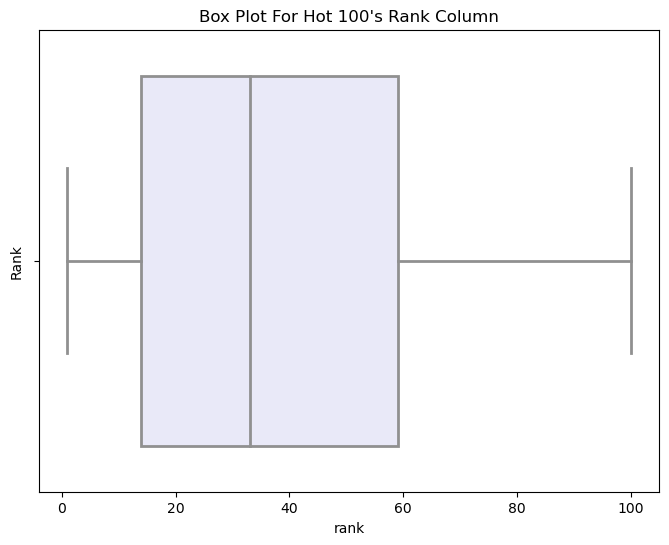

In [32]:
# creatign the boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_hot100_copy, x='rank', orient='h', linewidth=2, color='lavender')
plt.title("Box Plot For Hot 100's Rank Column")
plt.ylabel('Rank')
plt.show()

In [33]:
filtered_hot100_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8622 entries, 22 to 199389
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   artist           8622 non-null   object        
 1   chart_week       8622 non-null   datetime64[ns]
 2   rank             8622 non-null   int64         
 3   song_title       8622 non-null   object        
 4   main_artist      8622 non-null   object        
 5   featured_artist  8622 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 729.6+ KB


There are no outliers in the rank column! 

Information about this dataset:

- 8622 observations
- 6 features 
    - 4 are categorical
    - 1 is a date/time data type
    - 1 is numerical
- No missing values present in the dataframe
- Normalization is not needed as this dataset only has one numerical column which does not contain conituous numerical values, rather ranking values. 

### Artist's Albums Information

In [123]:
artist_albums = pd.read_csv('artist_album_info.csv')
artist_albums_df = pd.DataFrame(artist_albums)
artist_albums_df.head()

,artist,album_names,release_date,type
0,Rickie Lee Jones,"['Pieces of Treasure', 'Kicks', 'The Other Sid...","['2023-04-28', '2019-06-07', '2015-06-23', '20...","['album', 'album', 'album', 'album', 'album', ..."
1,Christopher Cross,"['Take Me As I Am', 'Secret Ladder', 'A Night ...","['2017-10-31', '2014-09-12', '2013-03-08', '20...","['album', 'album', 'album', 'album', 'album', ..."
2,Sheena Easton,"['The Definitive Singles 1980 - 1987', '15 Cla...","['2021-09-17', '2013-05-03', '2000-11-13', '20...","['album', 'album', 'album', 'album', 'album', ..."
3,Men At Work,"['Live in Christchurch 1982', 'Down Under 2011...","['2020-08-01', '2011-06-04', '1998-05-07', '19...","['album', 'album', 'album', 'album', 'album', ..."
4,Culture,"['Life', 'Live at Wembley - World Tour 2016', ...","['2019-05-01', '2017-12-08', '2003-01-01', '20...","['album', 'album', 'album', 'album', 'album', ..."


In [124]:
# similar to the best_new_df, will be dropping the first five rows
artist_albums_df = artist_albums_df.drop(artist_albums_df.index[:5])
artist_albums_df = artist_albums_df.reset_index()
artist_albums_df

,index,artist,album_names,release_date,type
0,5,Cyndi Lauper,"['True Colors (35th Anniversary Edition)', 'Sp...","['2021-10-15', '2016-06-24', '2016-05-06', '20...","['album', 'album', 'album', 'album', 'album', ..."
1,6,Sade,"['Bring Me Home - Live 2011', 'Soldier of Love...","['2012-05-07', '2010-02-08', '2002-02-18', '20...","['album', 'album', 'album', 'album', 'album', ..."
2,7,Bruce Hornsby & The Range,"['Deep Sea Vents', 'Spirit Trail 25th Annivers...","['2024-03-01', '2023-10-27', '2022-05-27', '20...","['album', 'album', 'album', 'album', 'album', ..."
3,8,Jody Watley,"['Paradise', 'Curvve Classics', 'The Makeover'...","['2014-07-28', '2008-10-24', '2006-08-08', '20...","['album', 'album', 'album', 'album', 'album', ..."
4,9,Tracy Chapman,"['Our Bright Future', 'Where You Live', 'Let I...","['2008-11-07', '2005-09-05', '2002-10-15', '20...","['album', 'album', 'album', 'album', 'album', ..."
5,10,Milli Vanilli,"['All Or Nothing US Remix Album', 'All Or Noth...","['1989-06-26', '1988-11-14', '2023-11-24', '20...","['album', 'album', 'single', 'single', 'single..."
6,11,Mariah Carey,"['Music Box: 30th Anniversary Edition', 'Butte...","['2023-09-08', '2022-09-16', '2020-12-11', '20...","['album', 'album', 'album', 'album', 'album', ..."
7,12,Marc Cohn,"['The Complete Atlantic Albums', 'Work To Do',...","['2020-10-16', '2019-08-09', '2019-05-17', '20...","['album', 'album', 'album', 'album', 'album', ..."
8,13,Arrested Development,"['Bullets In The Chamber', 'On The Cutting Roo...","['2024-01-12', '2023-03-17', '2021-12-10', '20...","['album', 'album', 'album', 'album', 'album', ..."
9,14,Toni Braxton,"['Spell My Name', 'Sex & Cigarettes', 'Love, M...","['2020-08-28', '2018-03-23', '2014-01-01', '20...","['album', 'album', 'album', 'album', 'album', ..."


This dataset looks a little complex. Basically this dataset contains information on the albums each Best New artists winner has released. Along with this, the albums release date and album type is also included in this dataset. 

The complex aspect of this dataset is that the "album_names", "release_date", and "type" columns contain list values, which respectively correspond to the artist. 

The dataset as is contains string represenations of lists, so technically it is not reading as an actual list. To fix this, I will use the ast library to convert the values in 'album_names', 'release_date', and 'type' columns into actual lists. 

From here I will utilize the .explode() function to split each element in the lists into a seperate row. I will do this for each column that contains list values ('album_names', 'release_date', 'type') to preserve the consitency of the album information. After exploding these columns, I will merge that column with the 'artist_name' column from the original dataset so that the artist's can correctly represetation there respective albums. 

In [125]:
# converting the string lists to actual lists for the three specified columns

artist_albums_df['album_names'] = artist_albums_df['album_names'].apply(ast.literal_eval)
artist_albums_df['release_date'] = artist_albums_df['release_date'].apply(ast.literal_eval)
artist_albums_df['type'] = artist_albums_df['type'].apply(ast.literal_eval)

Now the three columns contain list values!

In [126]:
# applyng the explode function to the three columns
explode_columns = ['album_names', 'release_date', 'type']

# new df to hold the newly exploded rows
# lambda will take each row and apply the explode function to it
explode_df = artist_albums_df[explode_columns].apply(lambda x: x.explode())

# adding a column to store the index numbers of each row
# this will be merged with the original df
explode_df['index_stored'] = explode_df.index

explode_df.head()

,album_names,release_date,type,index_stored
0,True Colors (35th Anniversary Edition),2021-10-15,album,0
0,Spotify Sessions,2016-06-24,album,0
0,Detour,2016-05-06,album,0
0,She's So Unusual - Spotify Commentary,2014-04-01,album,0
0,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album,0


In [128]:
# merging the og dataset and the exploded dataset to create new df
artist_album_expand = explode_df.merge(artist_albums_df['artist'], 
                                       left_on='index_stored', 
                                       right_index=True)


In [129]:
artist_album_expand.head()

,album_names,release_date,type,index_stored,artist
0,True Colors (35th Anniversary Edition),2021-10-15,album,0,Cyndi Lauper
0,Spotify Sessions,2016-06-24,album,0,Cyndi Lauper
0,Detour,2016-05-06,album,0,Cyndi Lauper
0,She's So Unusual - Spotify Commentary,2014-04-01,album,0,Cyndi Lauper
0,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album,0,Cyndi Lauper


From here I am going to drop the 'index_stored' column from this new dataframe, as it is no longer needed. I will also reorder this new dataframe to have the columns arranged in a logical way. 

In [130]:
# dropping the index_stored column
artist_album_expand = artist_album_expand.drop('index_stored', axis = 'columns')

artist_album_expand.head()

,album_names,release_date,type,artist
0,True Colors (35th Anniversary Edition),2021-10-15,album,Cyndi Lauper
0,Spotify Sessions,2016-06-24,album,Cyndi Lauper
0,Detour,2016-05-06,album,Cyndi Lauper
0,She's So Unusual - Spotify Commentary,2014-04-01,album,Cyndi Lauper
0,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album,Cyndi Lauper


In [131]:
# reordering the columns 
artist_album_expand = artist_album_expand.iloc[:, [3,0,1,2]]

artist_album_expand.head()

,artist,album_names,release_date,type
0,Cyndi Lauper,True Colors (35th Anniversary Edition),2021-10-15,album
0,Cyndi Lauper,Spotify Sessions,2016-06-24,album
0,Cyndi Lauper,Detour,2016-05-06,album
0,Cyndi Lauper,She's So Unusual - Spotify Commentary,2014-04-01,album
0,Cyndi Lauper,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album


In [132]:
# resetting the index
artist_album_expand = artist_album_expand.reset_index()

artist_album_expand

,index,artist,album_names,release_date,type
0,0,Cyndi Lauper,True Colors (35th Anniversary Edition),2021-10-15,album
1,0,Cyndi Lauper,Spotify Sessions,2016-06-24,album
2,0,Cyndi Lauper,Detour,2016-05-06,album
3,0,Cyndi Lauper,She's So Unusual - Spotify Commentary,2014-04-01,album
4,0,Cyndi Lauper,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album
...,...,...,...,...,...
750,37,Olivia Rodrigo,"Wondering (From ""High School Musical: The Musi...",2019-11-12,single
751,37,Olivia Rodrigo,"I Think I Kinda, You Know (From ""High School M...",2019-11-08,single
752,37,Olivia Rodrigo,"Let It Glow (From ""Frozen Northern Lights"")",2016-11-11,single
753,37,Olivia Rodrigo,Bizaardvark (Music from the TV Series),2016-10-07,single


In [133]:
# dropping the 'index' column
artist_album_expand = artist_album_expand.drop('index', axis = 'columns')

artist_album_expand

,artist,album_names,release_date,type
0,Cyndi Lauper,True Colors (35th Anniversary Edition),2021-10-15,album
1,Cyndi Lauper,Spotify Sessions,2016-06-24,album
2,Cyndi Lauper,Detour,2016-05-06,album
3,Cyndi Lauper,She's So Unusual - Spotify Commentary,2014-04-01,album
4,Cyndi Lauper,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album
...,...,...,...,...
750,Olivia Rodrigo,"Wondering (From ""High School Musical: The Musi...",2019-11-12,single
751,Olivia Rodrigo,"I Think I Kinda, You Know (From ""High School M...",2019-11-08,single
752,Olivia Rodrigo,"Let It Glow (From ""Frozen Northern Lights"")",2016-11-11,single
753,Olivia Rodrigo,Bizaardvark (Music from the TV Series),2016-10-07,single


Now that this dataset in ready to go, I am going to investigate and get familar with the dataset. Adjust the datatypes and any other issues. 

**Fixing Data Types**

In [134]:
artist_album_expand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist        755 non-null    object
 1   album_names   755 non-null    object
 2   release_date  755 non-null    object
 3   type          755 non-null    object
dtypes: object(4)
memory usage: 23.7+ KB


It looks like the 'release_date' column is labeled as an object data type instead of a date/time datatype. I will go ahead and fix this below. 

In [135]:
# checking to see instances where date is only year. 
only_year_count = 0



for value in artist_album_expand['release_date']:
    string_length = len(value)
    if string_length == 4:
        only_year_count += 1
        print(value)
        
only_year_count      

2018
1985
2000
1995
1988
1987
2001
1998
1989
1992
2001
1993
2000
1999
1996
1999
2001
2000
1999
2008
1989
2004
2002
2009
2006
2003
2006


27

There are 35 instances where Spotify did not provide us with an exact release date for certain albums/singles/compliations. Therefore the to_datetime function does not work as some dates are formatted like "mm-dd-yyyy" and others are formatted as "yyyy". To fix this, I have chosen to format the dates that are only years to '01-01-yyyy'. This will serve as a a general/estimated date of when these albums/singles/compliations were released. 

In [136]:
# identifying the instances where only the year is provided
only_year = artist_album_expand['release_date'].apply(lambda x: len(str(x))) == 4


In [137]:
# setting the day and month to 01 for the respective year
artist_album_expand.loc[only_year, 'release_date'] = pd.to_datetime(artist_album_expand.loc[only_year, 'release_date'] + '-01-01')


artist_album_expand.head()

,artist,album_names,release_date,type
0,Cyndi Lauper,True Colors (35th Anniversary Edition),2021-10-15,album
1,Cyndi Lauper,Spotify Sessions,2016-06-24,album
2,Cyndi Lauper,Detour,2016-05-06,album
3,Cyndi Lauper,She's So Unusual - Spotify Commentary,2014-04-01,album
4,Cyndi Lauper,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album


Now that all the values in the 'release_date' column follow the same format, I can now go ahead and change the column's data type. 

In [138]:
# changing the release_date data type
artist_album_expand['release_date'] = pd.to_datetime(artist_album_expand['release_date'])

artist_album_expand.head()

,artist,album_names,release_date,type
0,Cyndi Lauper,True Colors (35th Anniversary Edition),2021-10-15,album
1,Cyndi Lauper,Spotify Sessions,2016-06-24,album
2,Cyndi Lauper,Detour,2016-05-06,album
3,Cyndi Lauper,She's So Unusual - Spotify Commentary,2014-04-01,album
4,Cyndi Lauper,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album


In [139]:
artist_album_expand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   artist        755 non-null    object        
 1   album_names   755 non-null    object        
 2   release_date  755 non-null    datetime64[ns]
 3   type          755 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 23.7+ KB


There are no missing values in this dataset!

Information about this dataset: 
- 755 observations
- 4 features
    - 3 are categorical
    - 1 is a date/time data type
- No missing values present in the dataset
- Normalization not needed as this dataset does not have any numerical column, therefore there is no need to standarzie any scales.
- Outlier detection not needed, as there are no numerical columns present.



### Artist's Corresponding Genre 

In [140]:
artist_genres = pd.read_csv('artist_general_info.csv')
artist_genres_df = pd.DataFrame(artist_genres)
artist_genres_df

,artist,genre,followers,popularity
0,Rickie Lee Jones,"['folk', 'singer-songwriter']",194186,44
1,Christopher Cross,"['mellow gold', 'soft rock', 'yacht rock']",991746,63
2,Sheena Easton,"['mellow gold', 'minneapolis sound', 'new roma...",663311,54
3,Men At Work,"['album rock', 'australian rock', 'classic roc...",1213416,67
4,Culture,"['new romantic', 'new wave', 'new wave pop', '...",1527866,63
5,Cyndi Lauper,"['dance pop', 'new wave pop', 'permanent wave'...",2574782,71
6,Sade,"['british soul', 'sophisti-pop']",3643971,73
7,Bruce Hornsby & The Range,"['album rock', 'heartland rock', 'mellow gold'...",394117,53
8,Jody Watley,"['contemporary r&b', 'freestyle', 'minneapolis...",310445,38
9,Tracy Chapman,"['folk', 'lilith', 'singer-songwriter', ""women...",1678918,73


In [141]:
# similar to the best_new_df, will be dropping the first five rows
artist_genres_df = artist_genres_df.drop(artist_genres_df.index[:5])
artist_genres_df = artist_genres_df.reset_index()
artist_genres_df

,index,artist,genre,followers,popularity
0,5,Cyndi Lauper,"['dance pop', 'new wave pop', 'permanent wave'...",2574782,71
1,6,Sade,"['british soul', 'sophisti-pop']",3643971,73
2,7,Bruce Hornsby & The Range,"['album rock', 'heartland rock', 'mellow gold'...",394117,53
3,8,Jody Watley,"['contemporary r&b', 'freestyle', 'minneapolis...",310445,38
4,9,Tracy Chapman,"['folk', 'lilith', 'singer-songwriter', ""women...",1678918,73
5,10,Milli Vanilli,"['freestyle', 'new jack swing', 'new wave pop']",372807,54
6,11,Mariah Carey,"['dance pop', 'pop', 'urban contemporary']",9616883,78
7,12,Marc Cohn,['mellow gold'],94357,53
8,13,Arrested Development,"['atl hip hop', 'conscious hip hop', 'hip hop'...",283092,50
9,14,Toni Braxton,"['contemporary r&b', 'dance pop', 'r&b', 'urba...",3966911,62


First and foremost, I will go ahead a drop the 'followers' and 'popularity' column. I have no need for these two columns as they were calculated through Spotify with a specific algorithm. I will determine the success of an artists on my own later on. I will also drop the index column

In [142]:
# dropping the three columns
artist_genres_df = artist_genres_df.drop(['followers', 'popularity', 'index'], axis = 'columns')

artist_genres_df.head()

,artist,genre
0,Cyndi Lauper,"['dance pop', 'new wave pop', 'permanent wave'..."
1,Sade,"['british soul', 'sophisti-pop']"
2,Bruce Hornsby & The Range,"['album rock', 'heartland rock', 'mellow gold'..."
3,Jody Watley,"['contemporary r&b', 'freestyle', 'minneapolis..."
4,Tracy Chapman,"['folk', 'lilith', 'singer-songwriter', ""women..."


I am going to go ahead and remove the brackets and quotations surring the genres. 

Since many artists associate with several dfferent genres, rather than only choosing one genre to represent the artist, I made the decision to keep them all. As I stated, a lot of artists do not only follow one genre, and may tap into many different throughout the years and within their songs. Therefore, I want to represent this within my analysis.

In this case, each artist will have a string of genre/s associated with them in the genre column. This will allow me to analyze the popular genre keywords that the best new artist winners share in common.  

In [143]:
# Remove the brackets using string slicing via the .str accessor
artist_genres_df['genre'] = artist_genres_df['genre'].str[1:-1]
artist_genres_df.head()

,artist,genre
0,Cyndi Lauper,"'dance pop', 'new wave pop', 'permanent wave',..."
1,Sade,"'british soul', 'sophisti-pop'"
2,Bruce Hornsby & The Range,"'album rock', 'heartland rock', 'mellow gold',..."
3,Jody Watley,"'contemporary r&b', 'freestyle', 'minneapolis ..."
4,Tracy Chapman,"'folk', 'lilith', 'singer-songwriter', ""women'..."


In [144]:
#removing the quotes
artist_genres_df['genre'] = artist_genres_df['genre'].str.replace("'", "")

artist_genres_df.head()

,artist,genre
0,Cyndi Lauper,"dance pop, new wave pop, permanent wave, soft ..."
1,Sade,"british soul, sophisti-pop"
2,Bruce Hornsby & The Range,"album rock, heartland rock, mellow gold, piano..."
3,Jody Watley,"contemporary r&b, freestyle, minneapolis sound..."
4,Tracy Chapman,"folk, lilith, singer-songwriter, ""womens music"""


In [145]:
artist_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  38 non-null     object
 1   genre   38 non-null     object
dtypes: object(2)
memory usage: 736.0+ bytes


Information about this dataset:

- 38 observations
- 2 features 
    - Both are categorical
- No missing values present in the dataframe
- Normalization is not needed as this dataset only has one numerical column which does not contain conituous numerical values, rather ranking values. 

## MTV Video Music Award Winners/Nominees 

In [56]:
# reading the data
vmas_awards = pd.read_csv('vmas_winners_nominees2.csv')
vmas_awards_df = pd.DataFrame(vmas_awards)
vmas_awards_df

,date,award_category,artist_name,win
0,1985-09-13,Best Art Direction In a Video,Don Henley,Yes
1,1985-09-13,Best Art Direction In a Video,Culture Club,No
2,1985-09-13,Best Art Direction In a Video,Madonna,No
3,1985-09-13,Best Art Direction In a Video,Peter Brown,No
4,1985-09-13,Best Art Direction In a Video,Simple Minds,No
...,...,...,...,...
4027,2022-08-28,Video of the Year,Doja Cat,No
4028,2022-08-28,Video of the Year,Ed Sheeran,No
4029,2022-08-28,Video of the Year,Lil Nas X Feat. Jack Harlow,No
4030,2022-08-28,Video Vanguard Award,Nicki Minaj,Yes


Very similar to the Billboard Hot100s split I had to do to the dataset, I will be splitting the vmas_awards_df too. This is because of the fact that the songs that may have more than main artist on it, as well as more one or more featured artists. That steps I will take are as follows:

1. Splitting the main artists from the featured artists using variations of the seperator "featuring".
    - will split them into two columns, main_artist and fetaured_artist column
2. Splitting the main artists by commas.
    - Split in seperate main_artist columns (main_artist_1, main_artist_2, etc.)
3. Splitting the featured artists by comma.
    - Split in seperate featured_artist columns (featured_artist_1, featured_artist_2, etc.)

In [57]:
# making copy of the original vmas_awards_df
vmas_copy = vmas_awards_df

### First Split

In [58]:
vmas_split1 = vmas_copy['artist_name'].str.split('Feat.|feat.|Feat|feat', n = 1, expand = True)


vmas_copy['main_artist'] = vmas_split1[0]

vmas_copy['featured_artists'] = vmas_split1[1]

vmas_copy

,date,award_category,artist_name,win,main_artist,featured_artists
0,1985-09-13,Best Art Direction In a Video,Don Henley,Yes,Don Henley,None
1,1985-09-13,Best Art Direction In a Video,Culture Club,No,Culture Club,None
2,1985-09-13,Best Art Direction In a Video,Madonna,No,Madonna,None
3,1985-09-13,Best Art Direction In a Video,Peter Brown,No,Peter Brown,None
4,1985-09-13,Best Art Direction In a Video,Simple Minds,No,Simple Minds,None
...,...,...,...,...,...,...
4027,2022-08-28,Video of the Year,Doja Cat,No,Doja Cat,None
4028,2022-08-28,Video of the Year,Ed Sheeran,No,Ed Sheeran,None
4029,2022-08-28,Video of the Year,Lil Nas X Feat. Jack Harlow,No,Lil Nas X,Jack Harlow
4030,2022-08-28,Video Vanguard Award,Nicki Minaj,Yes,Nicki Minaj,None


### Second Split

While the main artists were intially seperated by commas during the data collection process, one artist's stage name includes a comma. Therefore, I will account for this artist when seperating the main artist column. The artist Tyler, the Creator will be an exception for this split. 

In [59]:
vmas_split2 = vmas_copy['main_artist'].str.split(r'(?<!Tyler),\s*', expand = True)

vmas_split2.columns = [f'main_artist_{i+1}' for i in range(vmas_split2.shape[1])]


# Concatenate the split columns with the original DataFrame
# creating a new df to avoid confusion and record each change made
vmas_copy = pd.concat([vmas_copy, vmas_split2], axis=1)

vmas_copy.reset_index(drop=True, inplace=True)
vmas_copy

,date,award_category,artist_name,win,main_artist,featured_artists,main_artist_1,main_artist_2,main_artist_3,main_artist_4,main_artist_5
0,1985-09-13,Best Art Direction In a Video,Don Henley,Yes,Don Henley,None,Don Henley,None,None,None,None
1,1985-09-13,Best Art Direction In a Video,Culture Club,No,Culture Club,None,Culture Club,None,None,None,None
2,1985-09-13,Best Art Direction In a Video,Madonna,No,Madonna,None,Madonna,None,None,None,None
3,1985-09-13,Best Art Direction In a Video,Peter Brown,No,Peter Brown,None,Peter Brown,None,None,None,None
4,1985-09-13,Best Art Direction In a Video,Simple Minds,No,Simple Minds,None,Simple Minds,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
4027,2022-08-28,Video of the Year,Doja Cat,No,Doja Cat,None,Doja Cat,None,None,None,None
4028,2022-08-28,Video of the Year,Ed Sheeran,No,Ed Sheeran,None,Ed Sheeran,None,None,None,None
4029,2022-08-28,Video of the Year,Lil Nas X Feat. Jack Harlow,No,Lil Nas X,Jack Harlow,Lil Nas X,None,None,None,None
4030,2022-08-28,Video Vanguard Award,Nicki Minaj,Yes,Nicki Minaj,None,Nicki Minaj,None,None,None,None


### Third Split

In [60]:
vmas_split3 = vmas_copy['featured_artists'].str.split(',', expand = True)

vmas_split3.columns = [f'featured_artist_{i+1}' for i in range(vmas_split3.shape[1])]


# Concatenate the split columns with the original DataFrame
# creating a new df to avoid confusion and record each change made
vmas_copy = pd.concat([vmas_copy, vmas_split3], axis=1)

vmas_copy

,date,award_category,artist_name,win,main_artist,featured_artists,main_artist_1,main_artist_2,main_artist_3,main_artist_4,main_artist_5,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6
0,1985-09-13,Best Art Direction In a Video,Don Henley,Yes,Don Henley,None,Don Henley,None,None,None,None,None,None,None,None,None,None
1,1985-09-13,Best Art Direction In a Video,Culture Club,No,Culture Club,None,Culture Club,None,None,None,None,None,None,None,None,None,None
2,1985-09-13,Best Art Direction In a Video,Madonna,No,Madonna,None,Madonna,None,None,None,None,None,None,None,None,None,None
3,1985-09-13,Best Art Direction In a Video,Peter Brown,No,Peter Brown,None,Peter Brown,None,None,None,None,None,None,None,None,None,None
4,1985-09-13,Best Art Direction In a Video,Simple Minds,No,Simple Minds,None,Simple Minds,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,2022-08-28,Video of the Year,Doja Cat,No,Doja Cat,None,Doja Cat,None,None,None,None,None,None,None,None,None,None
4028,2022-08-28,Video of the Year,Ed Sheeran,No,Ed Sheeran,None,Ed Sheeran,None,None,None,None,None,None,None,None,None,None
4029,2022-08-28,Video of the Year,Lil Nas X Feat. Jack Harlow,No,Lil Nas X,Jack Harlow,Lil Nas X,None,None,None,None,Jack Harlow,None,None,None,None,None
4030,2022-08-28,Video Vanguard Award,Nicki Minaj,Yes,Nicki Minaj,None,Nicki Minaj,None,None,None,None,None,None,None,None,None,None


since artist_name, featured_artists, and main_artists have the same information that is contained in the split columns, I will be dropping these three.

In [61]:
# dropping the three columns
vmas_copy = vmas_copy.drop(['artist_name', 'featured_artists', 'main_artist'], axis = 'columns')

vmas_copy

,date,award_category,win,main_artist_1,main_artist_2,main_artist_3,main_artist_4,main_artist_5,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6
0,1985-09-13,Best Art Direction In a Video,Yes,Don Henley,None,None,None,None,None,None,None,None,None,None
1,1985-09-13,Best Art Direction In a Video,No,Culture Club,None,None,None,None,None,None,None,None,None,None
2,1985-09-13,Best Art Direction In a Video,No,Madonna,None,None,None,None,None,None,None,None,None,None
3,1985-09-13,Best Art Direction In a Video,No,Peter Brown,None,None,None,None,None,None,None,None,None,None
4,1985-09-13,Best Art Direction In a Video,No,Simple Minds,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,2022-08-28,Video of the Year,No,Doja Cat,None,None,None,None,None,None,None,None,None,None
4028,2022-08-28,Video of the Year,No,Ed Sheeran,None,None,None,None,None,None,None,None,None,None
4029,2022-08-28,Video of the Year,No,Lil Nas X,None,None,None,None,Jack Harlow,None,None,None,None,None
4030,2022-08-28,Video Vanguard Award,Yes,Nicki Minaj,None,None,None,None,None,None,None,None,None,None


In [62]:
# removing the possible white spaces the strings have from splitting
for col in vmas_copy.iloc[:, 3:]:
    vmas_copy[col] = vmas_copy[col].str.strip()

**Filtered VMAS Dataset**

Now that I finished splitting the artists in the VMAS Awards dataset, I will use the final split dataset to to create a filtered dataset that only displays the instances where each of the artists in the "best_new" dataset won or were nominated for an award. This will be the dataset I will utilize from here on out, as I am focusing my analysis on those speciic artists. 

To do this, I will scan through each main artist/featured artist column on the dataset in order to find these artists.

In [63]:
# Best New Award Winners
selected_artists = best_new_df['artist_name'].unique()

# Filtering the hot100_split4 DataFrame to include rows where any of the selected artists appear
filtered_vmas = vmas_copy[
    (vmas_copy['main_artist_1'].isin(selected_artists)) |
    (vmas_copy['main_artist_2'].isin(selected_artists)) |
    (vmas_copy['main_artist_3'].isin(selected_artists)) |
    (vmas_copy['main_artist_4'].isin(selected_artists)) |
    (vmas_copy['main_artist_5'].isin(selected_artists)) |
    (vmas_copy['featured_artist_1'].isin(selected_artists)) |
    (vmas_copy['featured_artist_2'].isin(selected_artists)) |
    (vmas_copy['featured_artist_3'].isin(selected_artists)) |
    (vmas_copy['featured_artist_4'].isin(selected_artists)) |
    (vmas_copy['featured_artist_5'].isin(selected_artists)) |
    (vmas_copy['featured_artist_6'].isin(selected_artists)) 
]


filtered_vmas

,date,award_category,win,main_artist_1,main_artist_2,main_artist_3,main_artist_4,main_artist_5,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6
38,1985-09-13,Best Female Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None
39,1985-09-13,Best Female Video,No,Sade,None,None,None,None,None,None,None,None,None,None
54,1985-09-13,Best New Artist in a Video,No,Sade,None,None,None,None,None,None,None,None,None,None
186,1987-09-11,Best Cinematography in a Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None
207,1987-09-11,Best Female Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,2022-08-28,Song of Summer,No,Latto,None,None,None,None,Mariah Carey,DJ Khaled,None,None,None,None
4012,2022-08-28,Song of the Year,Yes,Billie Eilish,None,None,None,None,None,None,None,None,None,None
4015,2022-08-28,Song of the Year,No,Adele,None,None,None,None,None,None,None,None,None,None
4016,2022-08-28,Song of the Year,No,Elton John,None,None,None,None,Dua Lipa,None,None,None,None,None


### Shrinking the dataset 

There are a lot of missing values in the filter_vmas dataset. The resaon for this is that some songs that won or were nominated have more artists on a song than others, leaving some songs with columns with null values the main/featured columns. 

I want to make this datset as easy to read as possible, therefore I want to combine the five main artist columns into ONE main artist column and the 6 featured artist columns into ONE featured artist column. If the best new artist was a main artist in a song that was nominated or won in the VMAS, the main artist column will be listed as yes, while the fetaured artists column will be listed as no. Simlarily, if the artist was a featured artist in the song, the main artist column will be listed as no, while the featured artist column will be listed as yes. This will reduce the number of columns in the dataset as well as the massive amount of null values in the dataset. 

To do this I will:

    - make a copy of the filtered_vmas df to not corrupt the original filtered dataset and avoid confusion.
    - Create three new columns: main_artist, featured_artist, artist.
        - main_artist and featured_artist: Will have "no" values as default
        - artist: Will have None values as default
    - Iterate through each row in the filtered_vmas df copy and focus on the five main artist columns. 
    - Iterate through the selected_artists datasets (best_new artist winners) and check to see if the artists is present in any of the three columns. 
        - If they are present, then the main_artist column will be marked as yes.
        - If they are not present, then the featured_artists will be marked as yes.
    - assign the searched artists name to the artists column
    


In [64]:
# making a copy of the filtered vmas dataset 
filtered_vmas_copy = filtered_vmas

In [65]:
# Create new columns for main_artist and featured_artist
filtered_vmas_copy['main_artist'] = 'no'
filtered_vmas_copy['featured_artist'] = 'no'
filtered_vmas_copy['artist'] = None  # Initialize new column with None values

# Iterate over each row in filtered_hot100
for index, row in filtered_vmas_copy.iterrows():
    # Check if any of the selected artists are in columns 4, 5, 6, 7, 8
    if any(artist in row.values[3:9] for artist in selected_artists):
        filtered_vmas_copy.at[index, 'main_artist'] = 'yes'
    else:
        filtered_vmas_copy.at[index, 'featured_artist'] = 'yes'
    
    # Assign the name of the searched artist to the new column
    for artist in selected_artists:
        if artist in row.values[3:]:
            filtered_vmas_copy.at[index, 'artist'] = artist
            break  # Stop searching once the artist is found


/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_29526/584235678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_vmas_copy['main_artist'] = 'no'
/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_29526/584235678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_vmas_copy['featured_artist'] = 'no'
/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_29526/584235678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [66]:
filtered_vmas_copy

,date,award_category,win,main_artist_1,main_artist_2,main_artist_3,main_artist_4,main_artist_5,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6,main_artist,featured_artist,artist
38,1985-09-13,Best Female Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None,yes,no,Cyndi Lauper
39,1985-09-13,Best Female Video,No,Sade,None,None,None,None,None,None,None,None,None,None,yes,no,Sade
54,1985-09-13,Best New Artist in a Video,No,Sade,None,None,None,None,None,None,None,None,None,None,yes,no,Sade
186,1987-09-11,Best Cinematography in a Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None,yes,no,Cyndi Lauper
207,1987-09-11,Best Female Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None,yes,no,Cyndi Lauper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,2022-08-28,Song of Summer,No,Latto,None,None,None,None,Mariah Carey,DJ Khaled,None,None,None,None,yes,no,Mariah Carey
4012,2022-08-28,Song of the Year,Yes,Billie Eilish,None,None,None,None,None,None,None,None,None,None,yes,no,Billie Eilish
4015,2022-08-28,Song of the Year,No,Adele,None,None,None,None,None,None,None,None,None,None,yes,no,Adele
4016,2022-08-28,Song of the Year,No,Elton John,None,None,None,None,Dua Lipa,None,None,None,None,None,yes,no,Dua Lipa


In [67]:
# reordering the columns and excluding main/featured split columns
filtered_vmas_copy = filtered_vmas_copy.iloc[:, [16,0,1,2,14,15]]


filtered_vmas_copy

,artist,date,award_category,win,main_artist,featured_artist
38,Cyndi Lauper,1985-09-13,Best Female Video,No,yes,no
39,Sade,1985-09-13,Best Female Video,No,yes,no
54,Sade,1985-09-13,Best New Artist in a Video,No,yes,no
186,Cyndi Lauper,1987-09-11,Best Cinematography in a Video,No,yes,no
207,Cyndi Lauper,1987-09-11,Best Female Video,No,yes,no
...,...,...,...,...,...,...
4000,Mariah Carey,2022-08-28,Song of Summer,No,yes,no
4012,Billie Eilish,2022-08-28,Song of the Year,Yes,yes,no
4015,Adele,2022-08-28,Song of the Year,No,yes,no
4016,Dua Lipa,2022-08-28,Song of the Year,No,yes,no


In [68]:
filtered_vmas_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 38 to 4026
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   artist           216 non-null    object
 1   date             216 non-null    object
 2   award_category   216 non-null    object
 3   win              216 non-null    object
 4   main_artist      216 non-null    object
 5   featured_artist  216 non-null    object
dtypes: object(6)
memory usage: 19.9+ KB


In [184]:
filtered_vmas_copy['win'].unique()

array(['No ', 'Yes', 'Yes ', 'No'], dtype=object)

In [190]:
# stripping white spaces from win column

filtered_vmas_copy['win'] = filtered_vmas_copy['win'].str.strip()

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_29526/3896615649.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [191]:
filtered_vmas_copy['win'].unique()

array(['No', 'Yes'], dtype=object)

The date column is listed as a numerical data type. I will go ahead and change it to a date/time data type

In [69]:
filtered_vmas_copy['date'] = pd.to_datetime(filtered_vmas_copy['date'])

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_29526/2033136591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_vmas_copy['date'] = pd.to_datetime(filtered_vmas_copy['date'])


In [70]:
filtered_vmas_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 38 to 4026
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   artist           216 non-null    object        
 1   date             216 non-null    datetime64[ns]
 2   award_category   216 non-null    object        
 3   win              216 non-null    object        
 4   main_artist      216 non-null    object        
 5   featured_artist  216 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 19.9+ KB


There are no missing values in this dataset!

Information about this dataset: 
- 216 observations
- 6 features
    - 5 are categorical
    - 1 is a date/time data type
- No missing values present in the dataset
- Normalization not needed as this dataset does not have any numerical column, therefore there is no need to standarzie any scales.
- Outlier detection not needed, as there are no numerical columns present.



## American Music Awards Dataset 

In [71]:
amas_awards = pd.read_csv('ama_wins_nominees2.csv')
amas_awards_df = pd.DataFrame(amas_awards)
amas_awards_df

,date,award_name,artist_name,win
0,1985-01-28,Favorite Country Album,Kenny Rogers,Yes
1,1985-01-28,Favorite Country Album,Ricky Skaggs,No
2,1985-01-28,Favorite Country Album,Alabama,No
3,1985-01-28,Favorite Country Band/Duo/Group,Alabama,Yes
4,1985-01-28,Favorite Country Band/Duo/Group,The Statler Brothers,No
...,...,...,...,...
3152,2022-11-20,New Artist of the Year,Latto,No
3153,2022-11-20,New Artist of the Year,Steve Lacy,No
3154,2022-11-20,New Artist of the Year,Gayle,No
3155,2022-11-20,New Artist of the Year,Måneskin,No


Very similar to the Billboard Hot100s and VMAS split I had to do to the datasets, I will be splitting the amas_awards_df too. This is because of the fact that the songs that may have more than main artist on it, as well as more one or more featured artists. Luckily, the American Music Awards did not list the artists as fetaured artists, instead they were all viewd as the main artists. That steps I will take are as follows:

1. Splitting the artists from the featured artists using the seperator ",".


In [72]:
# copying the amas_awards_df
amas_copy = amas_awards_df

In [73]:
amas_split = amas_copy['artist_name'].str.split(',', expand = True)

amas_split.columns = [f'artist_{i+1}' for i in range(amas_split.shape[1])]


# Concatenate the split columns with the original DataFrame
# creating a new df to avoid confusion and record each change made
amas_copy = pd.concat([amas_copy, amas_split], axis=1)

amas_copy

,date,award_name,artist_name,win,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6
0,1985-01-28,Favorite Country Album,Kenny Rogers,Yes,Kenny Rogers,None,None,None,None,None
1,1985-01-28,Favorite Country Album,Ricky Skaggs,No,Ricky Skaggs,None,None,None,None,None
2,1985-01-28,Favorite Country Album,Alabama,No,Alabama,None,None,None,None,None
3,1985-01-28,Favorite Country Band/Duo/Group,Alabama,Yes,Alabama,None,None,None,None,None
4,1985-01-28,Favorite Country Band/Duo/Group,The Statler Brothers,No,The Statler Brothers,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
3152,2022-11-20,New Artist of the Year,Latto,No,Latto,None,None,None,None,None
3153,2022-11-20,New Artist of the Year,Steve Lacy,No,Steve Lacy,None,None,None,None,None
3154,2022-11-20,New Artist of the Year,Gayle,No,Gayle,None,None,None,None,None
3155,2022-11-20,New Artist of the Year,Måneskin,No,Måneskin,None,None,None,None,None


I can now drop the artist_name column as it contain the same information as the split columns. 

In [74]:
# dropping the artist_name column 
amas_copy = amas_copy.drop('artist_name', axis = 1)
amas_copy

,date,award_name,win,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6
0,1985-01-28,Favorite Country Album,Yes,Kenny Rogers,None,None,None,None,None
1,1985-01-28,Favorite Country Album,No,Ricky Skaggs,None,None,None,None,None
2,1985-01-28,Favorite Country Album,No,Alabama,None,None,None,None,None
3,1985-01-28,Favorite Country Band/Duo/Group,Yes,Alabama,None,None,None,None,None
4,1985-01-28,Favorite Country Band/Duo/Group,No,The Statler Brothers,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
3152,2022-11-20,New Artist of the Year,No,Latto,None,None,None,None,None
3153,2022-11-20,New Artist of the Year,No,Steve Lacy,None,None,None,None,None
3154,2022-11-20,New Artist of the Year,No,Gayle,None,None,None,None,None
3155,2022-11-20,New Artist of the Year,No,Måneskin,None,None,None,None,None


In [75]:
amas_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        3157 non-null   object
 1   award_name  3157 non-null   object
 2   win         3157 non-null   object
 3   artist_1    3157 non-null   object
 4   artist_2    100 non-null    object
 5   artist_3    13 non-null     object
 6   artist_4    5 non-null      object
 7   artist_5    4 non-null      object
 8   artist_6    2 non-null      object
dtypes: object(9)
memory usage: 222.1+ KB


In [76]:
# removing the possible white spaces the strings have from splitting
for col in amas_copy.iloc[:, 3:]:
    amas_copy[col] = amas_copy[col].str.strip()

In [77]:
# Best New Award Winners
selected_artists = best_new_df['artist_name'].unique()

# Filtering the ama_copy DataFrame to include rows where any of the selected artists appear
filtered_amas = amas_copy[
    (amas_copy['artist_1'].isin(selected_artists)) |
    (amas_copy['artist_2'].isin(selected_artists)) |
    (amas_copy['artist_3'].isin(selected_artists)) |
    (amas_copy['artist_4'].isin(selected_artists)) |
    (amas_copy['artist_5'].isin(selected_artists)) |
    (amas_copy['artist_6'].isin(selected_artists))

]


filtered_amas

,date,award_name,win,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6
36,1985-01-28,Favorite Pop/Rock Female Artist,Yes,Cyndi Lauper,None,None,None,None,None
39,1985-01-28,Favorite Pop/Rock Female Video Artist,Yes,Cyndi Lauper,None,None,None,None,None
150,1986-01-27,Favorite Soul/R&B Female Video Artist,No,Sade,None,None,None,None,None
325,1988-01-25,Favorite Soul/R&B Song,No,Jody Watley,None,None,None,None,None
358,1989-01-30,Favorite Pop/Rock Female Artist,No,Tracy Chapman,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
3011,2022-11-20,Favorite Female Hip-Hop Artist,No,Megan Thee Stallion,None,None,None,None,None
3022,2022-11-20,Favorite Female Pop Artist,No,Adele,None,None,None,None,None
3098,2022-11-20,Favorite Music Video,No,Adele,None,None,None,None,None
3103,2022-11-20,Favorite Pop Album,No,Adele,None,None,None,None,None


### Shrinking the dataset 

There are a lot of missing values in the filter_amas dataset. The resaon for this is that some songs that won or were nominated have more artists on a song than others, leaving some songs with columns with null values the artist columns. 

I want to make this datset as easy to read as possible, therefore I want to combine the six artist columns into ONE  artist column. Since none of the artists nominated for the awrds were listed as features, I will one add the artist colun which will just list the artist that appears in the row 

To do this I will:

    - make a copy of the filtered_vmas df to not corrupt the original filtered dataset and avoid confusion.
    - Create the artist columns.
    - Iterate through each row in the filtered_vmas df copy and focus on the six artist columns. 
    - Iterate through the selected_artists datasets (best_new artist winners) and check to see if the artists is present in any of the three columns. 
        - Add the artist who is present in the row to the artist column
    


In [78]:
# making a copy of the filtered_amas df
filtered_amas_copy = filtered_amas

In [79]:
# Create new columns for main_artist and featured_artist

filtered_amas_copy['artist'] = None  # Initialize new column with None values

# Iterate over each row in filtered_hot100
for index, row in filtered_amas_copy.iterrows():
    for artist in selected_artists:
        if artist in row.values[3:]:
            filtered_amas_copy.at[index, 'artist'] = artist
            break  # Stop searching once the artist is found


/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_29526/2925386888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_amas_copy['artist'] = None  # Initialize new column with None values


In [80]:
filtered_amas_copy

,date,award_name,win,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6,artist
36,1985-01-28,Favorite Pop/Rock Female Artist,Yes,Cyndi Lauper,None,None,None,None,None,Cyndi Lauper
39,1985-01-28,Favorite Pop/Rock Female Video Artist,Yes,Cyndi Lauper,None,None,None,None,None,Cyndi Lauper
150,1986-01-27,Favorite Soul/R&B Female Video Artist,No,Sade,None,None,None,None,None,Sade
325,1988-01-25,Favorite Soul/R&B Song,No,Jody Watley,None,None,None,None,None,Jody Watley
358,1989-01-30,Favorite Pop/Rock Female Artist,No,Tracy Chapman,None,None,None,None,None,Tracy Chapman
...,...,...,...,...,...,...,...,...,...,...
3011,2022-11-20,Favorite Female Hip-Hop Artist,No,Megan Thee Stallion,None,None,None,None,None,Megan Thee Stallion
3022,2022-11-20,Favorite Female Pop Artist,No,Adele,None,None,None,None,None,Adele
3098,2022-11-20,Favorite Music Video,No,Adele,None,None,None,None,None,Adele
3103,2022-11-20,Favorite Pop Album,No,Adele,None,None,None,None,None,Adele


In [81]:
filtered_amas_copy = filtered_amas_copy.iloc[:, [9,0,1,2]]


filtered_amas_copy

,artist,date,award_name,win
36,Cyndi Lauper,1985-01-28,Favorite Pop/Rock Female Artist,Yes
39,Cyndi Lauper,1985-01-28,Favorite Pop/Rock Female Video Artist,Yes
150,Sade,1986-01-27,Favorite Soul/R&B Female Video Artist,No
325,Jody Watley,1988-01-25,Favorite Soul/R&B Song,No
358,Tracy Chapman,1989-01-30,Favorite Pop/Rock Female Artist,No
...,...,...,...,...
3011,Megan Thee Stallion,2022-11-20,Favorite Female Hip-Hop Artist,No
3022,Adele,2022-11-20,Favorite Female Pop Artist,No
3098,Adele,2022-11-20,Favorite Music Video,No
3103,Adele,2022-11-20,Favorite Pop Album,No


In [82]:
filtered_amas_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 36 to 3114
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   artist      228 non-null    object
 1   date        228 non-null    object
 2   award_name  228 non-null    object
 3   win         228 non-null    object
dtypes: object(4)
memory usage: 17.0+ KB


The date column is listed as a numerical data type. I will go ahead and change it to a date/time data type

In [83]:
filtered_amas_copy['date'] = pd.to_datetime(filtered_amas_copy['date'])

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_29526/2575173240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_amas_copy['date'] = pd.to_datetime(filtered_amas_copy['date'])


In [192]:
# stripping white spaces from win column

filtered_amas_copy['win'] = filtered_amas_copy['win'].str.strip()

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_29526/2722044463.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
filtered_amas_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 36 to 3114
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   artist      228 non-null    object        
 1   date        228 non-null    datetime64[ns]
 2   award_name  228 non-null    object        
 3   win         228 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 17.0+ KB


There are no missing values in this dataset!

Information about this dataset: 
- 228 observations
- 4 features
    - 3 are categorical
    - 1 is a date/time data type
- No missing values present in the dataset
- Normalization not needed as this dataset does not have any numerical column, therefore there is no need to standarzie any scales.
- Outlier detection not needed, as there are no numerical columns present.



## Recording Industry Association of America (RIAA) Awards

In [293]:
riaa_awards = pd.read_csv('RIAA_awards.csv')
riaa_awards_df = pd.DataFrame(riaa_awards)
riaa_awards_df

,artist,title,format,award_month,award_day,award_year,award_type,type
0,Rickie Lee Jones,Flying Cowboys,Album,September,18,1997,Gold,Standard
1,Rickie Lee Jones,Pirates,Album,September,30,1981,Gold,Standard
2,Rickie Lee Jones,Rickie Lee Jones,Album,May,22,1979,Gold,Standard
3,Rickie Lee Jones,Rickie Lee Jones,Album,August,7,1979,Platinum,Standard
4,Christopher Cross,Christopher Cross,Album,August,17,1980,5x Platinum,Standard
...,...,...,...,...,...,...,...,...
1431,Olivia Rodrigo,SOUR,Album,November,17,2021,2x Platinum,Standard
1432,Olivia Rodrigo,SOUR,Album,June,23,2021,Platinum,Standard
1433,Olivia Rodrigo,SOUR,Album,May,30,2021,Gold,Standard
1434,Olivia Rodrigo,All I Want,Single,July,23,2021,Platinum,Digital


In this dataset, the date is split into three columns (award_day, award_year, award_type). I will fix this by combining these three columns into one data column. This way I will be able to convert it to a date/time data type. 

To do this, I will first change the month labels to their respective number label. 

In [294]:
# making a copy of the riaa_awards_df
riaa_copy = riaa_awards_df

In [295]:
# Changing months to number format

month_num = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12'
}

riaa_copy['award_month'] = riaa_copy['award_month'].map(month_num)

In [296]:
riaa_copy

,artist,title,format,award_month,award_day,award_year,award_type,type
0,Rickie Lee Jones,Flying Cowboys,Album,09,18,1997,Gold,Standard
1,Rickie Lee Jones,Pirates,Album,09,30,1981,Gold,Standard
2,Rickie Lee Jones,Rickie Lee Jones,Album,05,22,1979,Gold,Standard
3,Rickie Lee Jones,Rickie Lee Jones,Album,08,7,1979,Platinum,Standard
4,Christopher Cross,Christopher Cross,Album,08,17,1980,5x Platinum,Standard
...,...,...,...,...,...,...,...,...
1431,Olivia Rodrigo,SOUR,Album,11,17,2021,2x Platinum,Standard
1432,Olivia Rodrigo,SOUR,Album,06,23,2021,Platinum,Standard
1433,Olivia Rodrigo,SOUR,Album,05,30,2021,Gold,Standard
1434,Olivia Rodrigo,All I Want,Single,07,23,2021,Platinum,Digital


In [297]:
riaa_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       1436 non-null   object
 1   title        1436 non-null   object
 2   format       1436 non-null   object
 3   award_month  1436 non-null   object
 4   award_day    1436 non-null   int64 
 5   award_year   1436 non-null   int64 
 6   award_type   1436 non-null   object
 7   type         1436 non-null   object
dtypes: int64(2), object(6)
memory usage: 89.9+ KB


Now that is has been changed to a number lael, I will convert to a numeric data type.

In [298]:
riaa_copy['award_month'] = pd.to_numeric(riaa_copy['award_month'])

In [299]:
riaa_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       1436 non-null   object
 1   title        1436 non-null   object
 2   format       1436 non-null   object
 3   award_month  1436 non-null   int64 
 4   award_day    1436 non-null   int64 
 5   award_year   1436 non-null   int64 
 6   award_type   1436 non-null   object
 7   type         1436 non-null   object
dtypes: int64(3), object(5)
memory usage: 89.9+ KB


Now I can combine the three columns into one date column

In [300]:
#combining the month, day, year column to make one date column 

# Concatenate the columns to create a new date column
riaa_copy['award_date'] = riaa_copy['award_year'].astype(str) + '-' + riaa_copy['award_month'].astype(str) + '-' + riaa_copy['award_day'].astype(str)

# Convert the new date column to datetime format
riaa_copy['award_date'] = pd.to_datetime(riaa_copy['award_date'])

# Drop the original columns
riaa_copy = riaa_copy.drop(['award_year', 'award_month', 'award_day'], axis=1)


### EXPLAIN LATER

Chnaging the 2x, 3x, ... platinums awards to multi platinum awards for easier anaylis. SImilarily, doing the same for the 2x diamond award. 

In [302]:
# Replace any occurrence of '[number]x Platinum' with 'Multi Platinum'
riaar _copy['award_type'] = riaa_copy['award_type'].str.replace(r'^(\d+)x\s*Platinum$', 'Multi Platinum', regex=True)

# Replace any occurrence of '[number]x Diamond' with 'Multi Diamond'
riaa_copy['award_type'] = riaa_copy['award_type'].str.replace(r'^(\d+)x\s*Diamond$', 'Multi Diamond', regex=True)

riaa_copy

,artist,title,format,award_type,type,award_date
0,Rickie Lee Jones,Flying Cowboys,Album,Gold,Standard,1997-09-18
1,Rickie Lee Jones,Pirates,Album,Gold,Standard,1981-09-30
2,Rickie Lee Jones,Rickie Lee Jones,Album,Gold,Standard,1979-05-22
3,Rickie Lee Jones,Rickie Lee Jones,Album,Platinum,Standard,1979-08-07
4,Christopher Cross,Christopher Cross,Album,Multi Platinum,Standard,1980-08-17
...,...,...,...,...,...,...
1431,Olivia Rodrigo,SOUR,Album,Multi Platinum,Standard,2021-11-17
1432,Olivia Rodrigo,SOUR,Album,Platinum,Standard,2021-06-23
1433,Olivia Rodrigo,SOUR,Album,Gold,Standard,2021-05-30
1434,Olivia Rodrigo,All I Want,Single,Platinum,Digital,2021-07-23


In [308]:
#making dummy columns for future analysis


dummy_cols = ['award_type']
riaa_dummies = pd.get_dummies(riaa_copy[dummy_cols], prefix=dummy_cols)
dummy_riaa_df = pd.concat([riaa_copy, riaa_dummies], axis=1)


# Dropping the award type column
dummy_riaa_df = dummy_riaa_df.drop('award_type', axis = 'columns')


# changing headers


dummy_riaa_df = dummy_riaa_df.rename(columns = {'award_type_Gold': 'gold',
                                                'award_type_Platinum': 'platinum',
                                                'award_type_Diamond': 'diamond',
                                                'award_type_Multi Diamond': 'multi_diamond',
                                                'award_type_Multi Platinum': 'multi_platinum',})



dummy_riaa_df


,artist,title,format,type,award_date,diamond,gold,multi_diamond,multi_platinum,platinum
0,Rickie Lee Jones,Flying Cowboys,Album,Standard,1997-09-18,False,True,False,False,False
1,Rickie Lee Jones,Pirates,Album,Standard,1981-09-30,False,True,False,False,False
2,Rickie Lee Jones,Rickie Lee Jones,Album,Standard,1979-05-22,False,True,False,False,False
3,Rickie Lee Jones,Rickie Lee Jones,Album,Standard,1979-08-07,False,False,False,False,True
4,Christopher Cross,Christopher Cross,Album,Standard,1980-08-17,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
1431,Olivia Rodrigo,SOUR,Album,Standard,2021-11-17,False,False,False,True,False
1432,Olivia Rodrigo,SOUR,Album,Standard,2021-06-23,False,False,False,False,True
1433,Olivia Rodrigo,SOUR,Album,Standard,2021-05-30,False,True,False,False,False
1434,Olivia Rodrigo,All I Want,Single,Digital,2021-07-23,False,False,False,False,True


In [362]:
# stripping white spaces from artist column

dummy_riaa_df['artist'] = dummy_riaa_df['artist'].str.strip()

In [365]:
dummy_riaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   artist          1436 non-null   object        
 1   title           1436 non-null   object        
 2   format          1436 non-null   object        
 3   type            1436 non-null   object        
 4   award_date      1436 non-null   datetime64[ns]
 5   diamond         1436 non-null   bool          
 6   gold            1436 non-null   bool          
 7   multi_diamond   1436 non-null   bool          
 8   multi_platinum  1436 non-null   bool          
 9   platinum        1436 non-null   bool          
dtypes: bool(5), datetime64[ns](1), object(4)
memory usage: 63.2+ KB


There are no missing values in this dataset!

Information about this dataset: 
- 1436 observations
- 10 features
    - 4 are categorical
    - 1 is a date/time data type
    - 5 are boolean
- No missing values present in the dataset
- Normalization not needed as this dataset does not have any numerical column, therefore there is no need to standarzie any scales.
- Outlier detection not needed, as there are no numerical columns present.

## Artist Information

In [218]:
artist_info = pd.read_csv('artist_info.csv')
artist_info_df = pd.DataFrame(artist_info)

artist_info_df

,artist,city,state_province_parish,birth_country,gender,music_group
0,Rickie Lee Jones,Chicago,Illinois,United States of America,Female,No
1,Christopher Cross,San Antonio,Texas,United States of America,Male,no
2,Sheena Easton,Bellshill,Lanarkshire,Scotland,Female,No
3,Men At Work,Melbourne,Victoria,Australia,Male,Yes
4,Culture,Kingston,St. Andrew,Jamaica,Male,Yes
5,Cyndi Lauper,Brooklyn,New York,United States of America,Female,No
6,Sade,Ibadan,Oyo State,Nigeria,Female,No
7,Bruce Hornsby & The Range,Los Angeles,California,United States of America,Male,Yes
8,Jody Watley,Chicago,Illinois,United States of America,Female,No
9,Tracy Chapman,Cleveland,Ohio,United States of America,Female,No


In [219]:
artist_info_df['gender'].unique()

array(['Female ', 'Male', 'Female', 'Both', 'Both ', 'Male '],
      dtype=object)

In [220]:
artist_info_df['music_group'].unique()

array(['No', 'no', 'No ', 'Yes ', 'Yes'], dtype=object)

Need to remove the white spaces and change the casing to lower case for both columns. 

In [221]:
# fixing the gender column
artist_info_df['gender'] = artist_info_df['gender'].str.lower().str.strip()


# fixing the music group column
artist_info_df['music_group'] = artist_info_df['music_group'].str.lower().str.strip()

In [222]:
artist_info_df['gender'].unique()

array(['female', 'male', 'both'], dtype=object)

In [223]:
artist_info_df['music_group'].unique()

array(['no', 'yes'], dtype=object)

In [224]:
artist_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   artist                 43 non-null     object
 1   city                   43 non-null     object
 2   state_province_parish  43 non-null     object
 3   birth_country          43 non-null     object
 4   gender                 43 non-null     object
 5   music_group            43 non-null     object
dtypes: object(6)
memory usage: 2.1+ KB


# Exploratory Data Analysis

Questions:


1. What features are most prevalent among the Best New Artists Winners?

2. Does geographic origin influence the success of an artist in the industry?

3. Does the success of an artist's career decrease after winning this award?

4. Are there features that affect the success of an artist's career after winning this award?

In this part, I will be creating visuals not only to all of these datasets to life, but to also touch on some of my intial questions.


### 1. What features are most prevalent among the Best New Artists Winners?

First and foremost, I want view how many females and males have won this the Grammy's Best New Artist Award overall. This will be a great way to see which gender tends to receive the most awards. 

*Please note, that for bands that have a mix of genders, I have labeled the band's gender as both as "both". Furthemore, I recorded the gender of the band based on the embers of the band at the time of their Grammy Win.*

In [ ]:
# counting the number of wins of each gender
gender_counts = artist_info_df['gender'].value_counts()


In [ ]:
gender_counts

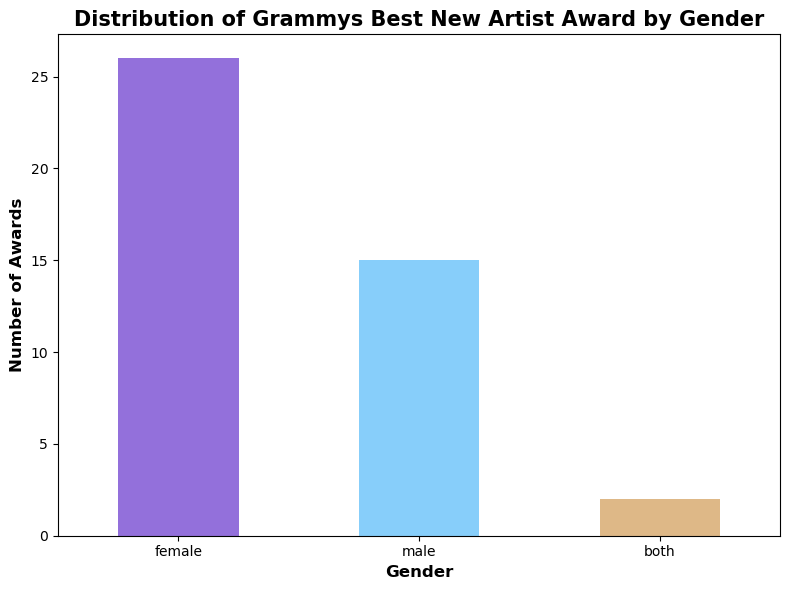

In [386]:
# creating the  bar chart
plt.figure(figsize=(8, 6))

gender_counts.plot(kind='bar', color=['mediumpurple','lightskyblue','burlywood'])

plt.title('Distribution of Grammys Best New Artist Award by Gender', 
          fontsize = 15, 
          fontweight = 'bold')

plt.xlabel('Gender', fontsize = 12, 
           fontweight='bold')

plt.ylabel('Number of Awards', fontsize = 12, 
           fontweight='bold')

plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()

**Note on Visual**

Here we can we that female artists have been awarded with the most Best New Artist award compared to male artists and bands with both genders. I have also displayed the gender_counts dataframe so that we can view the actual counts for each gender group.

Some of the artists who have won these awards are musical groups or duos. Therefore, I want to visual the number of music groups vs individual artists who have won this award. 

In [ ]:
# counting the number of music groups
group_counts = artist_info_df['music_group'].value_counts()

In [388]:
group_counts

music_group
no     31
yes    12
Name: count, dtype: int64

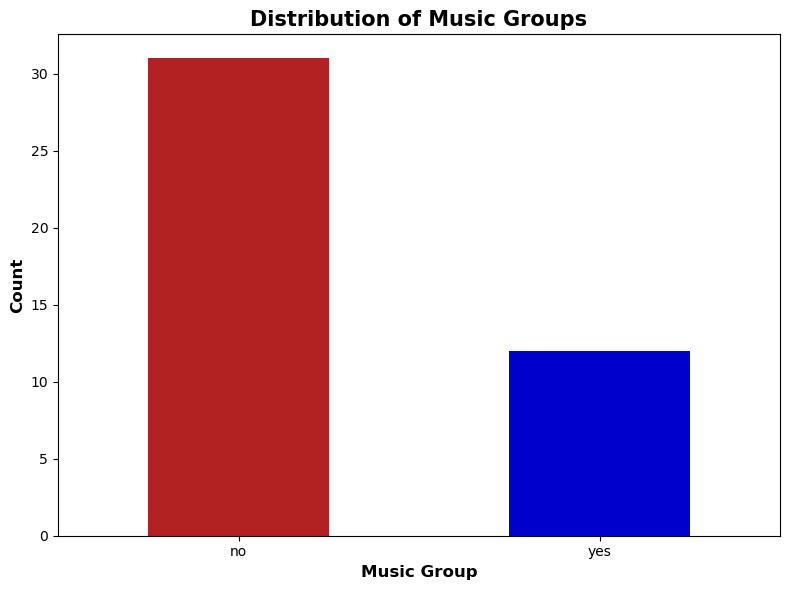

In [392]:
# creating the bar chart
plt.figure(figsize=(8, 6))

group_counts.plot(kind='bar', color=['firebrick', 'mediumblue'])

plt.title('Distribution of Music Groups', 
          fontsize = 15, 
          fontweight = 'bold')

plt.xlabel('Music Group', 
           fontsize = 12, 
           fontweight = 'bold')

plt.ylabel('Count', 
           fontsize = 12, 
           fontweight = 'bold')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()

**Note on Visual**

As we can see here, individual artists have received the most Best New Artist Award compared to music groups. However, we can see that there are quite a handful on musical groups who have won this award, almost have the amount of individual artist. 

Next up, since each artist is associated with several different genres, I want to visualize the most common genre/genre keywords shared by these Best New Artist winners. In order to do this, I will create a word cloud to display the most commen genre keyword present in the artist_genre dataframe.

In [95]:
#pip install WordCloud

In [415]:
# combing the genre row into one single string and ignoring the commas
text_data = ' '.join(artist_genres_df['genre'].str.replace(',', '').values)

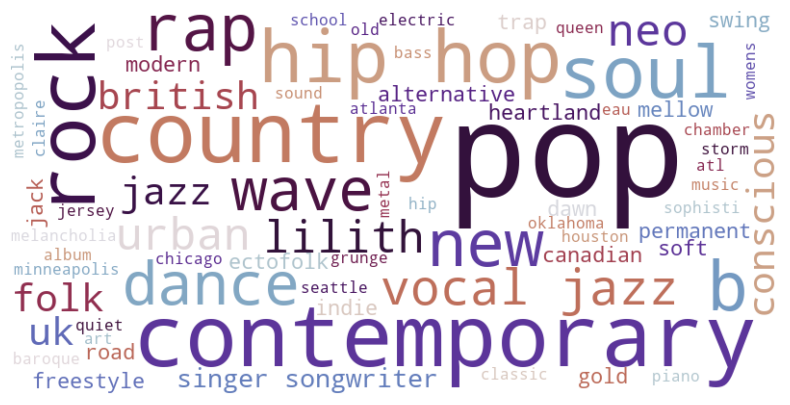

In [424]:
from wordcloud import WordCloud
# creating the wordcloud 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='twilight').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Notes of Visual**

Here we can see the word cloud of the genre key words, with the most popular words being "pop", "contemporary", "country" , "rock", and "rap". Below I made a bar chart to further visualize and compare the genre keyword counts.

In [ ]:
# splitting the text into words to create bar chart
words = text_data.split()

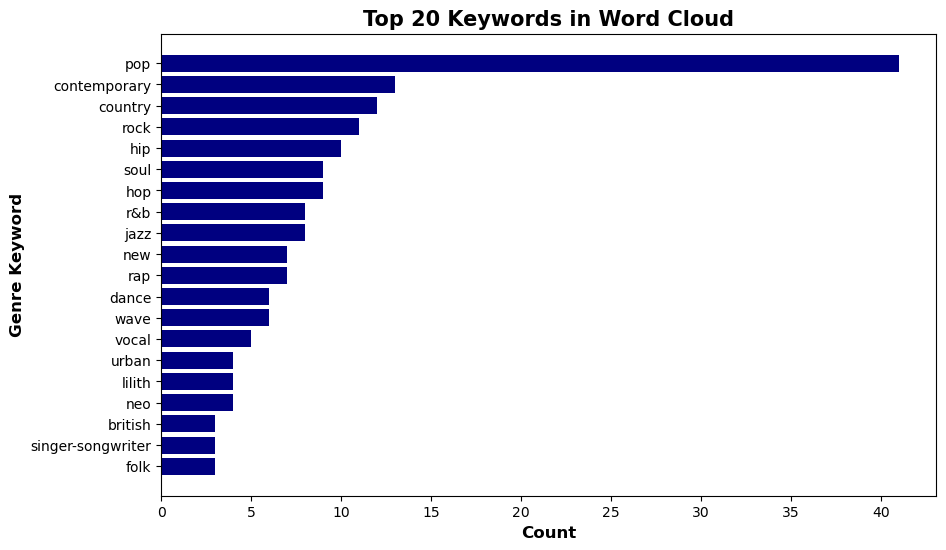

In [428]:
from collections import Counter

# count word frequency
word_counts = Counter(words)

# creating the the bar chart
top_n = 20  # displaying the top 20 genre keywords 
top_words = dict(word_counts.most_common(top_n))

plt.figure(figsize=(10, 6))

plt.barh(range(len(top_words)), list(top_words.values()), align='center', color = 'navy')

plt.yticks(range(len(top_words)), list(top_words.keys()))

plt.xlabel('Count', 
           fontsize = 12, 
           fontweight = 'bold')

plt.ylabel('Genre Keyword', 
           fontsize = 12, 
           fontweight = 'bold')

plt.title('Top 20 Keywords in Word Cloud', 
          fontsize = 15, 
          fontweight = 'bold')

plt.gca().invert_yaxis()  # inverting y-axis to display the most frequent words at the top
plt.show()


### Does the success of an artist's career decrease after winning this award?

In order to view the timelines of these artists and when they receved this awards and chart singles, I decide to create some x-axis interactive timeline chart using plotly in order to visualize these events in chronlogical order. This will allow us to really view the length of the artist's career. While this may not be a clear cut answer to the success of an artist, it will defiently showcase the longevity of these artists.

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge datasets on 'Artist'
merged_df = pd.merge(filtered_vmas_copy, filtered_amas_copy, on='artist',  suffixes=('_vmas', '_amas'))

merged_df2 = pd.merge(merged_df, best_new_df, on='artist')

merged_df3 = pd.merge(merged_df, artist_album_expand, on='artist')



merged_df3

,artist,date_vmas,award_category,win_vmas,main_artist,featured_artist,date_amas,award_name,win_amas,album_names,release_date,type
0,Cyndi Lauper,1985-09-13,Best Female Video,No,yes,no,1985-01-28,Favorite Pop/Rock Female Artist,Yes,True Colors (35th Anniversary Edition),2021-10-15,album
1,Cyndi Lauper,1985-09-13,Best Female Video,No,yes,no,1985-01-28,Favorite Pop/Rock Female Artist,Yes,Spotify Sessions,2016-06-24,album
2,Cyndi Lauper,1985-09-13,Best Female Video,No,yes,no,1985-01-28,Favorite Pop/Rock Female Artist,Yes,Detour,2016-05-06,album
3,Cyndi Lauper,1985-09-13,Best Female Video,No,yes,no,1985-01-28,Favorite Pop/Rock Female Artist,Yes,She's So Unusual - Spotify Commentary,2014-04-01,album
4,Cyndi Lauper,1985-09-13,Best Female Video,No,yes,no,1985-01-28,Favorite Pop/Rock Female Artist,Yes,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album
...,...,...,...,...,...,...,...,...,...,...,...,...
35555,Olivia Rodrigo,2022-08-28,Video of the Year,No,yes,no,2021-11-21,New Artist of the Year,Yes,"Wondering (From ""High School Musical: The Musi...",2019-11-12,single
35556,Olivia Rodrigo,2022-08-28,Video of the Year,No,yes,no,2021-11-21,New Artist of the Year,Yes,"I Think I Kinda, You Know (From ""High School M...",2019-11-08,single
35557,Olivia Rodrigo,2022-08-28,Video of the Year,No,yes,no,2021-11-21,New Artist of the Year,Yes,"Let It Glow (From ""Frozen Northern Lights"")",2016-11-11,single
35558,Olivia Rodrigo,2022-08-28,Video of the Year,No,yes,no,2021-11-21,New Artist of the Year,Yes,Bizaardvark (Music from the TV Series),2016-10-07,single


In [441]:
#KEEP

import plotly.graph_objs as go
import plotly.offline as py

# Create a Plotly figure
fig = go.Figure()

# this part will create the info I want to display in the hover text feature for each dataset I use

# creating empty list for VMAs
hover_text_vmas = []

# interatign through filtered vmas df
for index, row in filtered_vmas_copy.iterrows():
    
    # checking win column for each artist
    outcome = 'Winner' if row['win'] == 'Yes' else 'Nominee'
    # concatenating the information you want to display in the hover text
    text = f"Award Name: {row['award_category']}<br>" \
           f"Date: {row['date']}<br>" \
           f"Outcome: {outcome}"
    
    # appending text to list
    hover_text_vmas.append(text)

# creating empty list for AMAs    
hover_text_amas = []
for index, row in filtered_amas_copy.iterrows():
    
    # checking win column for each artist
    outcome = 'Winner' if row['win'] == 'Yes' else 'Nominee'
    # concatenating the information you want to display in the hover text
    text = f"Award Name: {row['award_name']}<br>" \
           f"Date: {row['date']}<br>" \
           f"Outcome: {outcome}"
    
    # appending text to list
    hover_text_amas.append(text)    

# creating empty list for Best New Artist win
hover_text_best = []
for index, row in best_new_df.iterrows():
    
    # no need to check wins, as these winners already did win the award
    text = f"Best New Artist: {row['artist']}<br>" \
           f"Date: {row['award_date']}<br>" 
    
    # appending text to list
    hover_text_best.append(text)        
    

# creating the timeline 

# scatter markers for Best New Artist Win
fig.add_trace(go.Scatter(x=best_new_df['award_date'], 
                         y=best_new_df['artist'],
                         mode='markers', 
                         marker=dict(symbol='star', 
                                     size=15, 
                                     color = 'darkred'),
                         name='Best New Artist Win', 
                         hoverinfo='text',
                         text=hover_text_best))


# scatter markers for VMA awards
fig.add_trace(go.Scatter(x=filtered_vmas_copy['date'], 
                         y=filtered_vmas_copy['artist'],
                         mode='markers', 
                         marker=dict(symbol='circle', 
                                     size=10, 
                                     color = 'darkorange'),
                         name='VMA Win or Nomination', 
                         hoverinfo='text',
                         text=hover_text_vmas))

# scatter markers for AMA awards
fig.add_trace(go.Scatter(x=filtered_amas_copy['date'],
                         y=filtered_amas_copy['artist'],
                         mode='markers', 
                         marker=dict(symbol='circle', 
                                     size=10, 
                                     color = 'limegreen'),
                         name='AMA Win or Nomination', 
                         hoverinfo='text',
                         text=hover_text_amas))

fig.update_layout(title='Awards Received by Artists',
                  title_font = dict(size = 20),
                  xaxis=dict(title='Date', title_font = dict(size = 16)),
                  yaxis=dict(title='Artist',title_font = dict(size = 16)))


# Show the interactive plot
py.plot(fig, filename='vma_ama_timeline.html')

'vma_ama_timeline.html'

Here I am creating the same time line, but for the Billboard Hot 100s chart 

In [444]:

fig = go.Figure()

# scatter markers for Best New Artist Win
fig.add_trace(go.Scatter(x=best_new_df['award_date'], y=best_new_df['artist'],
                         mode='markers', marker=dict(symbol='star', 
                                                     size=15,
                                                     color = 'darkred'),
                         name='Best New Artist Win'))

# scatter markers for hot 100s df
fig.add_trace(go.Scatter(x=filtered_hot100_copy['chart_week'], y=filtered_hot100_copy['artist'],
                         mode='markers', marker=dict(symbol='circle', 
                                                     size=10, 
                                                     color = 'yellowgreen'),
                         name='idk yet'))

fig.update_layout(title='Billboard Hot 100s Charted Songs',
                  title_font = dict(size = 20),
                  xaxis=dict(title='Date', title_font = dict(size = 16)),
                  yaxis=dict(title='Artist',title_font = dict(size = 16)))

# Show the interactive plot
py.plot(fig, filename='hot100s_timeline.html')

'hot100s_timeline.html'

**Notes on Visuals**

## Map Not Working

In [215]:
pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 1.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [226]:
from geopy.geocoders import Nominatim

def geocode_location(row):
    location = geolocator.geocode(f"{row['city']}, {row['state_province_parish']}, {row['birth_country']}")
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Geocode each artist's birth location in the DataFrame
artist_info_df['latitude'], artist_info_df['longitude'] = zip(*artist_info_df.apply(geocode_location, axis=1))



In [227]:
artist_info_df

,artist,city,state_province_parish,birth_country,gender,music_group,latitude,longitude
0,Rickie Lee Jones,Chicago,Illinois,United States of America,female,no,41.875562,-87.624421
1,Christopher Cross,San Antonio,Texas,United States of America,male,no,29.424600,-98.495141
2,Sheena Easton,Bellshill,Lanarkshire,Scotland,female,no,55.818931,-4.022579
3,Men At Work,Melbourne,Victoria,Australia,male,yes,-37.814245,144.963173
4,Culture,Kingston,St. Andrew,Jamaica,male,yes,18.018078,-76.778628
5,Cyndi Lauper,Brooklyn,New York,United States of America,female,no,40.652601,-73.949721
6,Sade,Ibadan,Oyo State,Nigeria,female,no,7.377746,3.897250
7,Bruce Hornsby & The Range,Los Angeles,California,United States of America,male,yes,34.053691,-118.242766
8,Jody Watley,Chicago,Illinois,United States of America,female,no,41.875562,-87.624421
9,Tracy Chapman,Cleveland,Ohio,United States of America,female,no,41.499657,-81.693677


In [ ]:
df['text'] = df['airport'] + ' ' + df['city'] + ', ' + df['state'] + ' ' + 'Arrivals: ' + df['cnt'].astype(str)
df.head()

# Bar Plots

In this part I am created dataframes and bar plots representing the counts of the number of Hot100s singles and artist has received, the number of albums released, number of VMAS and AMAS awards the have receive, and the number of RIAA awards they have received. 

In [248]:
#artist counts df

#hot100 count:

hot100s_count = filtered_hot100_copy['artist'].value_counts()

hot100s_count_df = pd.DataFrame({'num_on_chart':hot100s_count})

hot100s_count_df

,num_on_chart
artist,
Mariah Carey,833
Maroon 5,708
Carrie Underwood,630
Alicia Keys,442
Dua Lipa,431
Christina Aguilera,427
Adele,360
Sam Smith,355
Zac Brown Band,350


In [250]:
#album count:

album_count = artist_album_expand['artist'].value_counts()

album_count_df = pd.DataFrame({'album_count':artist_count })

album_count_df

,album_count
artist,
Cyndi Lauper,20
Sade,20
John Legend,20
Carrie Underwood,20
Amy Winehouse,20
Zac Brown Band,20
Esperanza Spalding,20
Bon Iver,20
fun.,20


In [259]:
#vma count:

vmas_count = filtered_vmas_copy['artist'].value_counts()

vmas_count_df = pd.DataFrame({'vmas_wins_noms':vmas_count})

vmas_count_df

,vmas_wins_noms
artist,
Billie Eilish,27
Christina Aguilera,25
Adele,20
Dua Lipa,19
Alicia Keys,14
Megan Thee Stallion,11
John Legend,10
Olivia Rodrigo,9
Jody Watley,8


In [260]:
# visualizing types of awards these artists received

#ama count:

amas_count = filtered_amas_copy['artist'].value_counts()

amas_count_df = pd.DataFrame({'amas_wins_noms':amas_count})

amas_count_df

,amas_wins_noms
artist,
Mariah Carey,39
Carrie Underwood,26
Alicia Keys,16
Maroon 5,15
Adele,14
Toni Braxton,11
Megan Thee Stallion,9
Zac Brown Band,9
Billie Eilish,8


In [366]:
last_five_cols = dummy_riaa_df.iloc[:, -5:]

# Group by artist and sum the values in the last five columns for each artist
riaa_counts = last_five_cols.groupby(dummy_riaa_df['artist']).sum()

riaa_counts

,diamond,gold,multi_diamond,multi_platinum,platinum
artist,,,,,
Adele,3,20,0,54,15
Alessia Cara,0,10,0,10,5
Alicia Keys,0,31,0,37,20
Amy Winehouse,0,3,0,1,3
Arrested Development,0,5,0,3,1
Billie Eilish,1,26,0,15,21
Bon Iver,0,9,0,1,3
Bruce Hornsby & The Range,0,3,0,2,2
Carrie Underwood,0,29,0,35,24


In [368]:
riaa_counts['Total'] = riaa_counts.sum(axis=1)


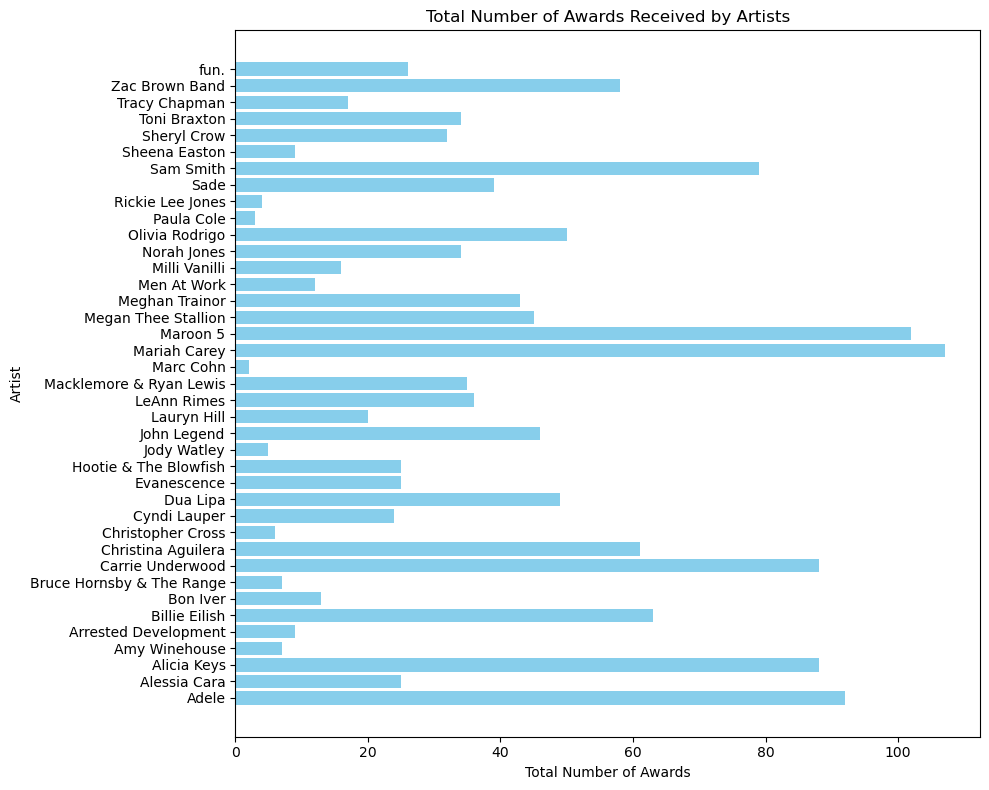

In [369]:
import matplotlib.pyplot as plt

# Assuming riaa_counts is your DataFrame containing the counts of awards for each artist

# Sum the counts of diamonds, platinum, etc., for each artist

# Create a horizontal bar chart of the total awards received by each artist
plt.figure(figsize=(10, 8))
plt.barh(riaa_counts.index, riaa_counts['Total'], color='skyblue')
plt.title('Total Number of Awards Received by Artists')
plt.xlabel('Total Number of Awards')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()


<Figure size 3000x2500 with 0 Axes>

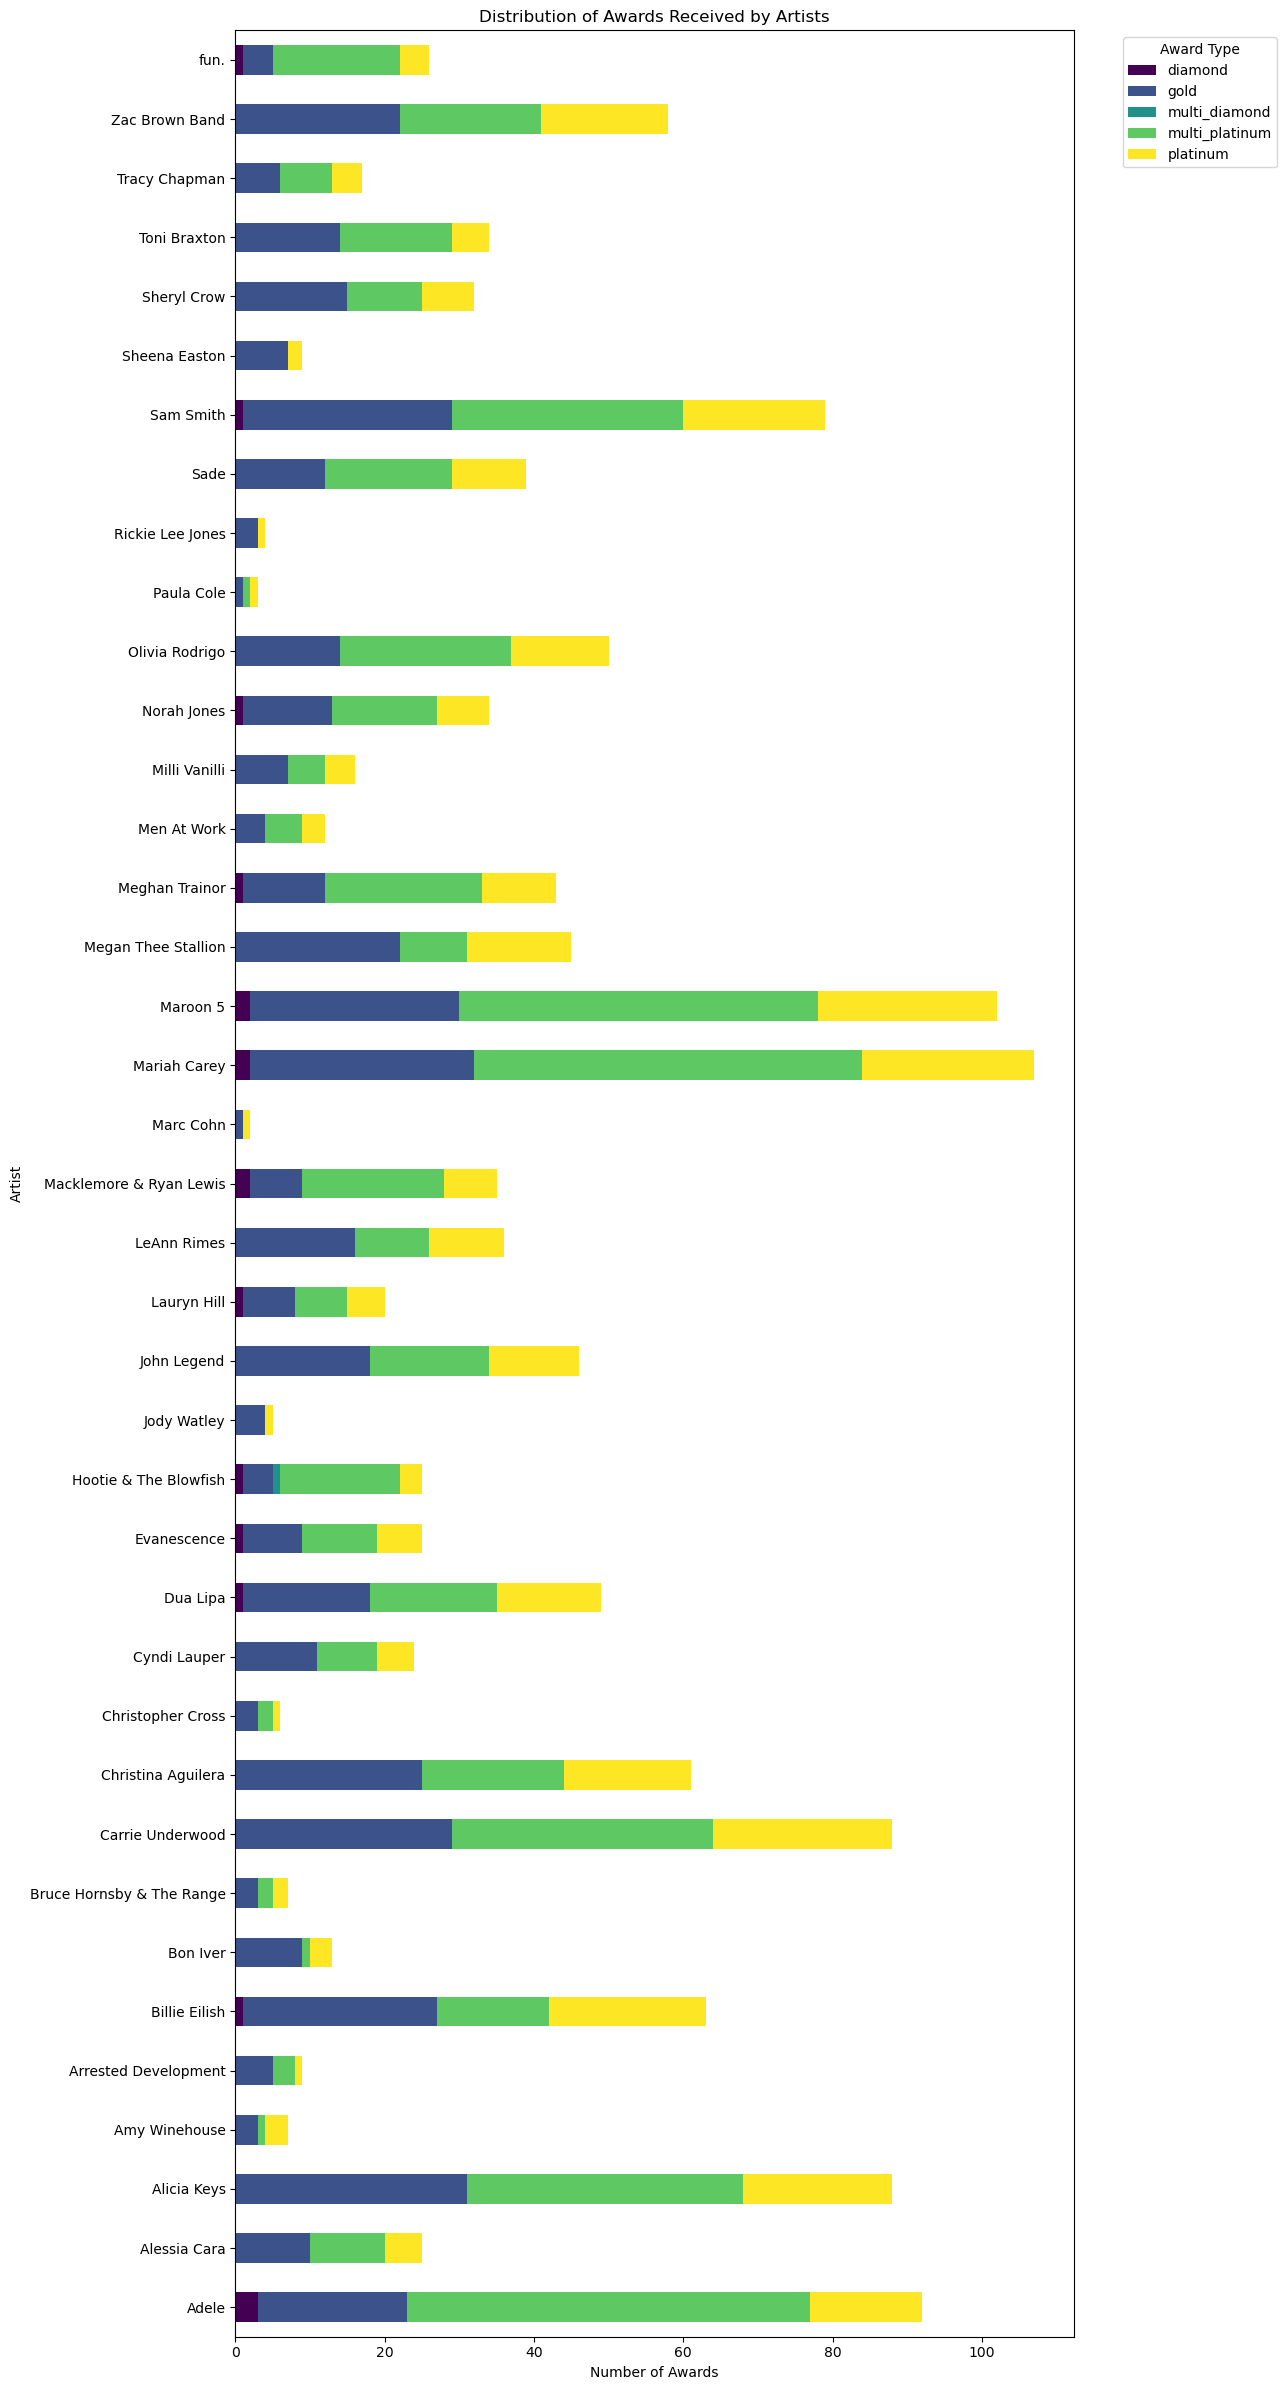

In [370]:
plt.figure(figsize=(30, 25))
riaa_counts.drop('Total', axis=1).plot(kind='barh', stacked=True, cmap='viridis')
plt.title('Distribution of Awards Received by Artists')
plt.xlabel('Number of Awards')
plt.ylabel('Artist')
plt.legend(title='Award Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[8, 5,10, 10])
plt.show()